# Mining multiple pathogen-host protein interactomes for the detection of shared patterns.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Mining-multiple-pathogen-host-protein-interactomes-for-the-detection-of-shared-patterns." data-toc-modified-id="Mining-multiple-pathogen-host-protein-interactomes-for-the-detection-of-shared-patterns.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mining multiple pathogen-host protein interactomes for the detection of shared patterns.</a></span></li><li><span><a href="#Data-collection-and-exploration" data-toc-modified-id="Data-collection-and-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data collection and exploration</a></span><ul class="toc-item"><li><span><a href="#Protein-protein-interaction-data-sources" data-toc-modified-id="Protein-protein-interaction-data-sources-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Protein-protein interaction data sources</a></span><ul class="toc-item"><li><span><a href="#Data-filtering-and-clean-up" data-toc-modified-id="Data-filtering-and-clean-up-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Data filtering and clean-up</a></span></li><li><span><a href="#Taxonomic-diversity-of-data-set" data-toc-modified-id="Taxonomic-diversity-of-data-set-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Taxonomic diversity of data set</a></span></li></ul></li><li><span><a href="#Annotation-data" data-toc-modified-id="Annotation-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Annotation data</a></span><ul class="toc-item"><li><span><a href="#Gene-Ontology" data-toc-modified-id="Gene-Ontology-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Gene Ontology</a></span></li></ul></li><li><span><a href="#Hosts" data-toc-modified-id="Hosts-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Hosts</a></span></li><li><span><a href="#Adding-protein-annotations:-Gene-Ontology-and-InterPro-domains" data-toc-modified-id="Adding-protein-annotations:-Gene-Ontology-and-InterPro-domains-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Adding protein annotations: Gene Ontology and InterPro domains</a></span><ul class="toc-item"><li><span><a href="#Number-of-columns-in-data-set" data-toc-modified-id="Number-of-columns-in-data-set-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Number of columns in data set</a></span></li><li><span><a href="#Retrieve-data-sources" data-toc-modified-id="Retrieve-data-sources-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Retrieve data sources</a></span></li><li><span><a href="#Number-of-Entrez-genes" data-toc-modified-id="Number-of-Entrez-genes-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Number of Entrez genes</a></span></li></ul></li><li><span><a href="#Check-overlap-between-data-sets" data-toc-modified-id="Check-overlap-between-data-sets-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Check overlap between data sets</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Data collection and exploration

In [1]:
import os, sys
import matplotlib.pyplot as plt

# pretty tables
from IPython.display import display, HTML

# setup correct path to script files
from pathlib import Path
my_file = Path("main.py")
if not my_file.is_file():
    import sys,os
    os.chdir('../src/ppi_tools/')
    sys.path.append('../src/')

sys.path.append(os.path.abspath('..'))    

from pathlib import Path

import argparse
import numpy as np
import pandas as pd

import id_mapper
import label_go
import label_interpro
import ppi_import

from data_prep import retrieve_taxids

from go_tools import gaf_parser
from go_tools import obo_tools

In [2]:
# %%capture
# run main script to annotate and convert PPI datasets into a format suitable for frequent item set mining.
# and suppress output
%run main.py -d

Read PPI data set VirHostNet2 from ../../data/raw/ppi_data/VirHostNet_January_2017.txt.
Read PPI data set HPIDB2 from ../../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt.
Read PPI data set PHISTO from ../../data/raw/ppi_data/phisto_Jan19_2017.csv.
Concatenating PPI datasets...
Converted all found identifiers to UniProt ACs.
Omitted 460 PPIs due to the existance of multiple mappings.
Omitting intra-species interactions...

Data source sizes:

origin
HPIDB2         55045
PHISTO          7946
VirHostNet2    21482
dtype: int64

Number of duplicated interactions on raw datasets
41838

Number of unique interactions per raw data set
origin
HPIDB2         41658
PHISTO          6521
VirHostNet2    18731
Name: xref_partners_sorted, dtype: int64

Number of interactions without UniProt AC
origin
HPIDB2         2718
VirHostNet2    1811
dtype: int64

Omitting duplicates as defined by UniProt ACs and taxids.
Retrieving Herpes taxids from ../../data/interim/child_taxids_of_10292.txt
Omitting al


Number of interactions for each pathogen grouping
pathogen_groups
bovine_ah1        33
epstein_barr    4656
equid_av1         16
equid_gv2          4
gallid_av2        21
human_av2         26
human_av3        101
human_bv5        160
human_bv6A         4
human_bv6B         3
human_gv8        806
human_hsv1       990
murid_bv1         58
murid_gv4        409
papiine_gv1        4
saimiri_gv2        9
suid_av1          61
dtype: int64
Adding InterPro annotations...


## Protein-protein interaction data sources
The protein-protein interaction (PPI) datasets were retrieved from the following sources.

- The HPIDB 2.0 dataset was retrieved from: [http://www.agbase.msstate.edu/hpi/downloads/hpidb2.mitab.zip]. [^fn1]
- The VirHostNet 2.0 dataset is available from: [http://virhostnet.prabi.fr/] (release January 2017).[^fn2]
- The PHISTO dataset was obtained from [http://www.phisto.org/index.xhtml] by using the browse utility (Data update: January 19, 2017).[^fn3]
- The PSI-MI ontology .obo file was downloaded from [http://ontologies.berkeleybop.org/mi.obo] (data-version: releases/2017-06-14).[^fn4]

The different primary data sources in the are:

In [50]:
%%bash
printf 'HPIDB2:\n'
tail -n +2 ../../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt | cut -f1 | sed -r 's/(^.*):.*/\1/g' | sort -u
printf "\nVirHostNet:\n"
tail -n +2 ../../data/raw/ppi_data/VirHostNet_January_2017.txt | cut -f1 | sed -r 's/(^.*):.*/\1/g' | sort -u

HPIDB2:
ensembl
entrez gene/locuslink
intact
uniprotkb

VirHostNet:
refseq
uniprotkb


- HPIDB2
    - uniprotkb
    - intact
    - ensembl
    - entrez gene/locuslink
- VirHosNet
    - uniprotkb
    - refseq
- PHISTO
    - uniprotkb

### Data filtering and clean-up

All PPIs pertaining to the Herpesviridae familiy were extracted from the above PPI datasets.

In [9]:
from main import *

In [10]:
%%capture
# create taxid dictionaries
name2taxid, taxid2name = retrieve_taxids.parse_taxid_names(r'../../data/raw/taxdump/names.dmp')
with Path(r'../../data/interim/child_taxids_of_10292.txt').open() as taxid_file:
        herpes_taxids = [str('taxid:' + line.split('|')[0]) for line in taxid_file]
# print([taxid2name[i[6:]] for i in herpes_taxids])
df_virhost = ppi_import.read_mitab_virhost(r'../../data/raw/ppi_data/VirHostNet_January_2017.txt')

df_hpidb2 = ppi_import.read_mitab_hpidb2(r'../../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt')

df_phisto = ppi_import.read_mitab_phisto(r'../../data/raw/ppi_data/phisto_Jan19_2017.csv',
                                         r'../../data/raw/ppi_data/mi.obo')
df_concat = concat_interaction_datasets([df_hpidb2, df_virhost, df_phisto])
# filter on Herpesviridae
df_herpes = df_concat.loc[(df_concat.taxid_A.isin(herpes_taxids)) | df_concat.taxid_B.isin(herpes_taxids)]
df_herpes = df_herpes.reset_index(drop=True)
# create combined identifier
xref_partners_sorted_array = np.sort(np.stack((df_herpes.xref_A, df_herpes.xref_B), axis=1), axis=1)
xref_partners_df = pd.DataFrame(xref_partners_sorted_array, columns=['A', 'B'])
df_herpes['xref_partners_sorted'] = xref_partners_df['A'] + '%' + xref_partners_df['B']

Duplicated entries were removed, e.g. multiple PPI entries might exist for two proteins that differ in pathogen source (strains might share proteins), publication or experimental method.

In [12]:
print(np.sum(df_herpes.duplicated(subset=['xref_partners_sorted'])), 'duplicated PPIs were removed.')
df_herpes = df_herpes.drop_duplicates(subset=['xref_partners_sorted'], keep='first')
df_herpes = df_herpes.reset_index(drop=True)

12835 duplicated PPIs were removed.


Only inter-species PPIs were retained.

Original data set size: 8788 
Only inter-species PPI: 7904 
Number of removed PPIs: 884


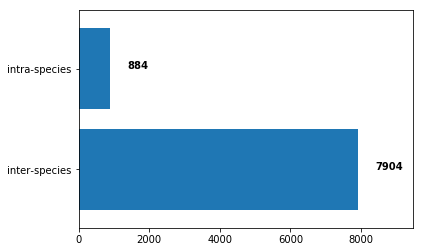

In [13]:
annotate_inter_intra(df_herpes)
df_inter_intra = df_herpes.copy()
df_herpes = df_herpes[df_herpes['inter-intra'] == 'inter-species']
df_herpes = df_herpes.reset_index(drop=True)
print('Original data set size:', df_inter_intra.shape[0], '\nOnly inter-species PPI:', 
      df_herpes.shape[0], '\nNumber of removed PPIs:', df_inter_intra.shape[0] - df_herpes.shape[0])
# inter-intra plot
height = df_inter_intra.groupby('inter-intra').size()
bars = df_inter_intra.groupby('inter-intra').size().index
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
for i in range(len(y_pos)):
    plt.text(x = height[i]+500 , y = y_pos[i], s = height[i], size = 10, fontweight = 'bold')
# plt.tight_layout(pad=0)
plt.margins(0.2, 0.1)
# plt.subplots_adjust(right=2.3)
plt.show()

All protein identifiers were mapped to `UniProtKB`s, except for a number of `intact:EBI`s, `entrez gene/locuslink`s  and `refseq`s for which no corresponding UniProtKB was found.

78 + 167 additional PPIs were removed because a) no valid mapping to UniProt accession numbers were found or b) multiple mappings were found. Retaining the latter would artificially inflate counts during frequent item set mining. 

In [14]:
id_mapper.map2uniprot(df_herpes, filepath=r'../../data/interim/mappings/')
df_herpes = id_mapper.remove_mult(df_herpes)

## adding
df_herpes.reset_index(inplace=True, drop=True)


unmapped = df_herpes.loc[~(df_herpes['xref_A'].str.contains('uniprotkb:') &
                           df_herpes['xref_B'].str.contains('uniprotkb:'))]
print('Unmapped proteins:',unmapped.shape[0])
df_herpes = df_herpes.loc[(df_herpes['xref_A'].str.contains('uniprotkb:') & # only select remapped entries
                           df_herpes['xref_B'].str.contains('uniprotkb:'))] 
# TO THIS BEFORE CREATING
df_herpes.reset_index(inplace=True, drop=True)
# re-create combined identifier
xref_partners_sorted_array = np.sort(np.stack((df_herpes.xref_A, df_herpes.xref_B), axis=1), axis=1)
xref_partners_df = pd.DataFrame(xref_partners_sorted_array, columns=['A', 'B'])
df_herpes['xref_partners_sorted'] = xref_partners_df['A'] + '%' + xref_partners_df['B']

Converted all found identifiers to UniProt ACs.
Omitted 167 PPIs due to the existance of multiple mappings.
Unmapped proteins: 78


Surprisingly, the re-mapping resulted in a number of new duplicates!

In [15]:
print(np.sum(df_herpes.duplicated(subset=['xref_partners_sorted'])), 'duplicated PPIs were removed.')
df_herpes = df_herpes.drop_duplicates(subset=['xref_partners_sorted'], keep='first')
df_herpes = df_herpes.reset_index(drop=True)

295 duplicated PPIs were removed.


For example, the following interaction was catalogued once for _Human herpesvirus 8 strain GK18_ and once for the higher order _Human gammaherpesvirus 8_. These issues could be resolved by filtering on PPI-partners **and** taxids.

In [16]:
display(df_herpes.loc[df_herpes.xref_partners_sorted=='uniprotkb:Q13547%uniprotkb:Q2HR82'])
display(df_concat.loc[df_concat.interaction_identifiers=='biogrid:669512'])
display(df_concat.loc[df_concat.interaction_identifiers=='intact:EBI-9006990|imex:IM-21800-6'])

,aliases_A,aliases_B,alt_identifiers_A,alt_identifiers_B,author,confidence_score,detection_method,display_id_A,display_id_B,interaction_identifiers,interaction_type,origin,pathogen,protein_seq1,protein_seq2,protein_taxid_1_cat,protein_taxid_1_name,protein_taxid_2_cat,protein_taxid_2_name,protein_xref_1_display_id,protein_xref_1_unique,protein_xref_2_display_id,protein_xref_2_unique,publication,source_database,source_database_ids,taxid_A,taxid_B,xref_A,xref_B,xref_partners_sorted,inter-intra
6,psi-mi:hdac1_human(display_long)|uniprotkb:HDAC1(gene name)|psi-mi:HDAC1(display_short)|uniprotkb:RPD3L1(gene name synonym),psi-mi:kbzip_hhv8p(display_long)|uniprotkb:K8(gene name)|psi-mi:K8(display_short),intact:EBI-301834|uniprotkb:Q92534,intact:EBI-9006943,Martínez et al. (2012),intact-miscore:0.43,psi-mi:MI:0006(anti bait coimmunoprecipitation),NaN,NaN,intact:EBI-9006990|imex:IM-21800-6,psi-mi:MI:0914(association),HPIDB2,NaN,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYGLYRKMEIYRPHKANAEEMTKYHSDDYIKFLRSIRPDNMSEYSKQMQRFNVGEDCPVFDGLFEFCQLSTGGSVASAVKLNKQQTDIAVNWAGGLHHAKKSEASGFCYVNDIVLAILELLKYHQRVLYIDIDIHHGDGVEEAFYTTDRVMTV...,MPRMKDIPTKSSPGTDNSEKDEAVIEEDLSLNGQPFFTDNTDGGENEVSWTSSLLSTYVGCQPPAIPVCETVIDLTAPSQSGAPGDEHLPCSLNAETKFHIPDPSWTLSHTPPRGPHISQQLPTRRSKRRLHRKFEEERLCTKAKQGAGRPVPASVVKVGNITPHYGEELTRGDAVPAAPITPPYPRVQRPAQPTH...,ANIMAL,human|Homo sapiens,VIRUS,hhv8p|Human herpesvirus 8,HDAC1_HUMAN,UNIPROT_AC:Q13547,KBZIP_HHV8P,UNIPROT_AC:Q2HR82,pubmed:22416134|imex:IM-21800,UniProt,psi-mi:MI:0486(UniProt),taxid:9606,taxid:868565,uniprotkb:Q13547,uniprotkb:Q2HR82,uniprotkb:Q13547%uniprotkb:Q2HR82,inter-species


,aliases_A,aliases_B,alt_identifiers_A,alt_identifiers_B,author,confidence_score,detection_method,display_id_A,display_id_B,interaction_identifiers,interaction_type,origin,pathogen,protein_seq1,protein_seq2,protein_taxid_1_cat,protein_taxid_1_name,protein_taxid_2_cat,protein_taxid_2_name,protein_xref_1_display_id,protein_xref_1_unique,protein_xref_2_display_id,protein_xref_2_unique,publication,source_database,source_database_ids,taxid_A,taxid_B,xref_A,xref_B
1775,entrez gene/locuslink:GON-10(gene name synonym)|entrez gene/locuslink:HD1(gene name synonym)|entrez gene/locuslink:RPD3(gene name synonym)|entrez gene/locuslink:RPD3L1(gene name synonym),-,biogrid:109315|entrez gene/locuslink:HDAC1|entrez gene/locuslink:RP4-811H24.2,biogrid:1776965|entrez gene/locuslink:K8|entrez gene/locuslink:HHV8GK18_gp54,Martinez FP (2012),-,psi-mi:MI:0004(affinity chromatography technology),NaN,NaN,biogrid:669512,psi-mi:MI:0915(physical association),HPIDB2,NaN,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYGLYRKMEIYRPHKANAEEMTKYHSDDYIKFLRSIRPDNMSEYSKQMQRFNVGEDCPVFDGLFEFCQLSTGGSVASAVKLNKQQTDIAVNWAGGLHHAKKSEASGFCYVNDIVLAILELLKYHQRVLYIDIDIHHGDGVEEAFYTTDRVMTV...,MPRMKDIPTKSSPGTDNSEKDEAVIEEDLSLNGQPFFTDNTDGGENEVSWTSSLLSTYVGCQPPAIPVCETVIDLTAPSQSGAPGDEHLPCSLNAETKFHIPDPSWTLSHTPPRGPHISQQLPTRRSKRRLHRKFEEERLCTKAKQGAGRPVPASVVKVGNITPHYGEELTRGDAVPAAPITPPYPRVQRPAQPTH...,ANIMAL,Homo sapiens,VIRUS,Human herpesvirus 8,HDAC1_HUMAN,UNIPROT_AC:Q13547,KBZIP_HHV8P,UNIPROT_AC:Q2HR82,pubmed:22416134,BioGRID,psi-mi:MI:0463(biogrid),taxid:9606,taxid:37296,entrez gene/locuslink:3065,entrez gene/locuslink:4961462


,aliases_A,aliases_B,alt_identifiers_A,alt_identifiers_B,author,confidence_score,detection_method,display_id_A,display_id_B,interaction_identifiers,interaction_type,origin,pathogen,protein_seq1,protein_seq2,protein_taxid_1_cat,protein_taxid_1_name,protein_taxid_2_cat,protein_taxid_2_name,protein_xref_1_display_id,protein_xref_1_unique,protein_xref_2_display_id,protein_xref_2_unique,publication,source_database,source_database_ids,taxid_A,taxid_B,xref_A,xref_B
106,psi-mi:hdac1_human(display_long)|uniprotkb:HDAC1(gene name)|psi-mi:HDAC1(display_short)|uniprotkb:RPD3L1(gene name synonym),psi-mi:kbzip_hhv8p(display_long)|uniprotkb:K8(gene name)|psi-mi:K8(display_short),intact:EBI-301834|uniprotkb:Q92534,intact:EBI-9006943,Martínez et al. (2012),intact-miscore:0.43,psi-mi:MI:0006(anti bait coimmunoprecipitation),NaN,NaN,intact:EBI-9006990|imex:IM-21800-6,psi-mi:MI:0914(association),HPIDB2,NaN,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYGLYRKMEIYRPHKANAEEMTKYHSDDYIKFLRSIRPDNMSEYSKQMQRFNVGEDCPVFDGLFEFCQLSTGGSVASAVKLNKQQTDIAVNWAGGLHHAKKSEASGFCYVNDIVLAILELLKYHQRVLYIDIDIHHGDGVEEAFYTTDRVMTV...,MPRMKDIPTKSSPGTDNSEKDEAVIEEDLSLNGQPFFTDNTDGGENEVSWTSSLLSTYVGCQPPAIPVCETVIDLTAPSQSGAPGDEHLPCSLNAETKFHIPDPSWTLSHTPPRGPHISQQLPTRRSKRRLHRKFEEERLCTKAKQGAGRPVPASVVKVGNITPHYGEELTRGDAVPAAPITPPYPRVQRPAQPTH...,ANIMAL,human|Homo sapiens,VIRUS,hhv8p|Human herpesvirus 8,HDAC1_HUMAN,UNIPROT_AC:Q13547,KBZIP_HHV8P,UNIPROT_AC:Q2HR82,pubmed:22416134|imex:IM-21800,UniProt,psi-mi:MI:0486(UniProt),taxid:9606,taxid:868565,uniprotkb:Q13547,uniprotkb:Q2HR82
108,psi-mi:hdac2_human(display_long)|uniprotkb:HDAC2(gene name)|psi-mi:HDAC2(display_short),psi-mi:kbzip_hhv8p(display_long)|uniprotkb:K8(gene name)|psi-mi:K8(display_short),intact:EBI-301821|uniprotkb:B4DL58|uniprotkb:E1P561|uniprotkb:B3KRS5|uniprotkb:Q5SRI8|uniprotkb:Q5SZ86|uniprotkb:Q8NEH4,intact:EBI-9006943,Martínez et al. (2012),intact-miscore:0.54,psi-mi:MI:0006(anti bait coimmunoprecipitation),NaN,NaN,intact:EBI-9006990|imex:IM-21800-6,psi-mi:MI:0914(association),HPIDB2,NaN,MAYSQGGGKKKVCYYYDGDIGNYYYGQGHPMKPHRIRMTHNLLLNYGLYRKMEIYRPHKATAEEMTKYHSDEYIKFLRSIRPDNMSEYSKQMQRFNVGEDCPVFDGLFEFCQLSTGGSVAGAVKLNRQQTDMAVNWAGGLHHAKKSEASGFCYVNDIVLAILELLKYHQRVLYIDIDIHHGDGVEEAFYTTDRVMT...,MPRMKDIPTKSSPGTDNSEKDEAVIEEDLSLNGQPFFTDNTDGGENEVSWTSSLLSTYVGCQPPAIPVCETVIDLTAPSQSGAPGDEHLPCSLNAETKFHIPDPSWTLSHTPPRGPHISQQLPTRRSKRRLHRKFEEERLCTKAKQGAGRPVPASVVKVGNITPHYGEELTRGDAVPAAPITPPYPRVQRPAQPTH...,ANIMAL,human|Homo sapiens,VIRUS,hhv8p|Human herpesvirus 8,HDAC2_HUMAN,UNIPROT_AC:Q92769,KBZIP_HHV8P,UNIPROT_AC:Q2HR82,pubmed:22416134|imex:IM-21800,UniProt,psi-mi:MI:0486(UniProt),taxid:9606,taxid:868565,uniprotkb:Q92769,uniprotkb:Q2HR82


As a side-note: this also displays another discrepancy in the data set. The interaction `intact:EBI-9006990|imex:IM-21800-6` id is actually used for two separate PPIs, between _uniprotkb:Q13547_ & _uniprotkb:Q2HR82_ and between _uniprotkb:Q92769_ & _uniprotkb:Q2HR82_. The human proteins are Histone deacetylase 1/2 and the pathogen virus is a HHV-8 E3 SUMO-protein ligase. Due to our filtering on unique protein id - protein id pairs, this should not be an issue for us.

The majority of PPI interactions are of the type (physical) association.

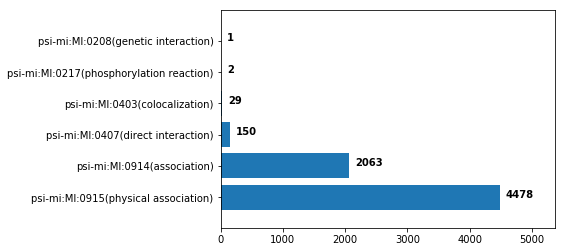

In [17]:
height = df_herpes['interaction_type'].value_counts()
bars = height.index
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
for i in range(len(y_pos)):
    plt.text(x = height[i]+100 , y = y_pos[i], s = height[i], size = 10, fontweight = 'bold')
plt.margins(0.2, 0.1)
plt.show()

### Taxonomic diversity of data set

The final data set consists of 7364 unique PPI between Herpesviridae and the following hosts:

In [18]:
all_taxids = df_herpes['taxid_A'].append(df_herpes['taxid_B']).unique()
host_taxids = list(np.setdiff1d(all_taxids, herpes_taxids))
host_list = []
for i in host_taxids:
    taxid = i.split(':')[1]
    count = df_herpes['xref_partners_sorted'].loc[(df_herpes['taxid_A'] == i) | (df_herpes['taxid_B'] == i)].shape[0]
    host_list.append({'Taxid' : taxid, 'Name' : taxid2name[taxid], 'Count' : count})
host_df = pd.DataFrame(host_list).sort_values('Count', ascending=False)
display(host_df)
reorder_pathogen_host_entries(df_herpes, host_taxids)

,Count,Name,Taxid
14,7035,Homo sapiens,9606
1,58,Rattus norvegicus,10116
0,29,Mus musculus,10090
17,23,Bos taurus,9913
9,7,Gallus gallus,9031
15,6,Equus caballus,9796
13,4,Pongo abelii,9601
16,3,Sus scrofa,9823
5,2,Caenorhabditis elegans,6239
11,2,Macaca fascicularis,9541


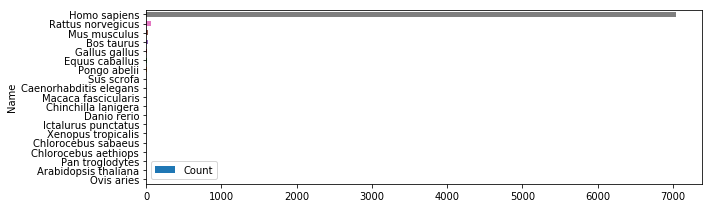

In [19]:
host_df.sort_values('Count').plot(x='Name',y='Count', kind="barh", width=0.5,figsize=(10, 3))
plt.tight_layout()
plt.show()

In [20]:
herpes_taxids = list(np.setdiff1d(all_taxids, host_taxids))
pathogen_list = []
for i in herpes_taxids:
    taxid = i.split(':')[1]
    count = df_herpes['xref_partners_sorted'].loc[(df_herpes['taxid_A'] == i) | (df_herpes['taxid_B'] == i)].shape[0]
    pathogen_list.append({'Taxid' : taxid, 'Name' : taxid2name[taxid], 'Count' : count})
path_df = pd.DataFrame(pathogen_list).sort_values('Count', ascending=False)
display(path_df)

,Count,Name,Taxid
24,2171,Human herpesvirus 4 strain B95-8,10377
45,2159,Epstein-barr virus strain ag876,82830
1,849,Herpes simplex virus (type 1 / strain 17),10299
37,409,Murid gammaherpesvirus 4,33708
40,386,Human gammaherpesvirus 8,37296
23,346,Human gammaherpesvirus 4,10376
48,262,Human herpesvirus 8 strain GK18,868565
41,190,Human herpesvirus 8 type M,435895
0,135,Human alphaherpesvirus 1,10298
38,87,Human herpesvirus 3 strain Oka vaccine,341980


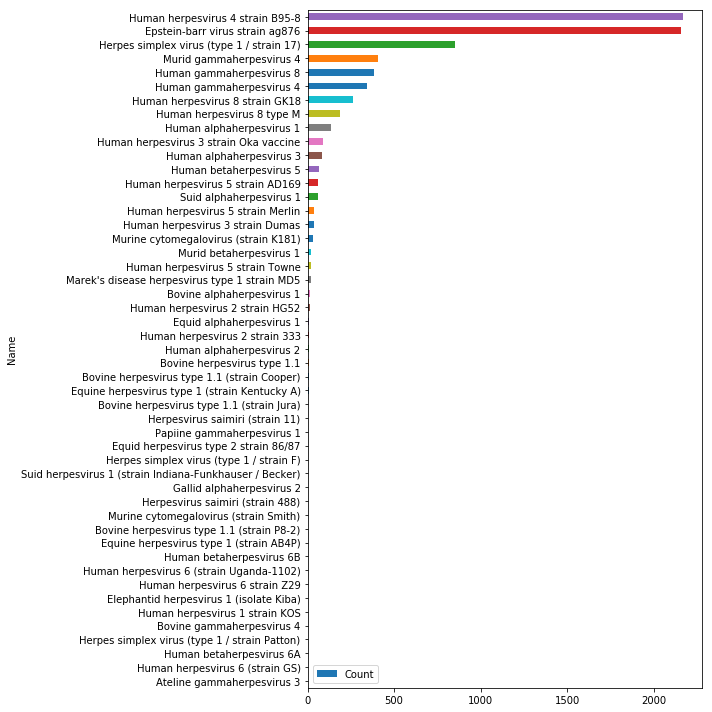

In [21]:
path_df.sort_values('Count').plot(x='Name',y='Count', kind="barh", width=0.5,figsize=(10, 10))
plt.tight_layout()
plt.show()

## Annotation data

### Gene Ontology

All proteins in the PPI data set were annotated with their Gene Ontology terms (all three namespaces were used: _biological process_, _molecular function_ and _cellular location_). 

In [ ]:
go_dict = obo_tools.importOBO(r'../../data/raw/go_data/go.obo')
obo_tools.buildGOtree(go_dict, root_nodes=['GO:0008150', 'GO:0005575', 'GO:0003674'])
protein_set = set(df_herpes.xref_A.append(df_herpes.xref_B, ignore_index=True).str.extract('^.*:(\w*)-?',expand=False).unique())
gaf_dict = gaf_parser.importGAF(r'../../data/raw/go_data/gene_association_hosts_10292.goa', protein_set)

In [134]:
print(np.sum(df_herpes.duplicated(subset=['xref_partners_sorted'])), 'duplicated PPIs were removed.')


0 duplicated PPIs were removed.


In [31]:
df_herpes.shape

(7659, 32)

In [13]:
df_herpes.loc[df_herpes.duplicated(subset=['xref_partners_sorted'])]

,aliases_A,aliases_B,alt_identifiers_A,alt_identifiers_B,author,confidence_score,detection_method,display_id_A,display_id_B,interaction_identifiers,interaction_type,origin,pathogen,protein_seq1,protein_seq2,protein_taxid_1_cat,protein_taxid_1_name,protein_taxid_2_cat,protein_taxid_2_name,protein_xref_1_display_id,protein_xref_1_unique,protein_xref_2_display_id,protein_xref_2_unique,publication,source_database,source_database_ids,taxid_A,taxid_B,xref_A,xref_B,xref_partners_sorted,inter-intra
155,entrez gene/locuslink:GON-10(gene name synonym)|entrez gene/locuslink:HD1(gene name synonym)|entrez gene/locuslink:RPD3(gene name synonym)|entrez gene/locuslink:RPD3L1(gene name synonym),-,biogrid:109315|entrez gene/locuslink:HDAC1|entrez gene/locuslink:RP4-811H24.2,biogrid:1776965|entrez gene/locuslink:K8|entrez gene/locuslink:HHV8GK18_gp54,Martinez FP (2012),-,psi-mi:MI:0004(affinity chromatography technology),NaN,NaN,biogrid:669512,psi-mi:MI:0915(physical association),HPIDB2,NaN,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYGLYRKMEIYRPHKANAEEMTKYHSDDYIKFLRSIRPDNMSEYSKQMQRFNVGEDCPVFDGLFEFCQLSTGGSVASAVKLNKQQTDIAVNWAGGLHHAKKSEASGFCYVNDIVLAILELLKYHQRVLYIDIDIHHGDGVEEAFYTTDRVMTV...,MPRMKDIPTKSSPGTDNSEKDEAVIEEDLSLNGQPFFTDNTDGGENEVSWTSSLLSTYVGCQPPAIPVCETVIDLTAPSQSGAPGDEHLPCSLNAETKFHIPDPSWTLSHTPPRGPHISQQLPTRRSKRRLHRKFEEERLCTKAKQGAGRPVPASVVKVGNITPHYGEELTRGDAVPAAPITPPYPRVQRPAQPTH...,ANIMAL,Homo sapiens,VIRUS,Human herpesvirus 8,HDAC1_HUMAN,UNIPROT_AC:Q13547,KBZIP_HHV8P,UNIPROT_AC:Q2HR82,pubmed:22416134,BioGRID,psi-mi:MI:0463(biogrid),taxid:9606,taxid:37296,uniprotkb:Q13547,uniprotkb:Q2HR82,uniprotkb:Q13547%uniprotkb:Q2HR82,inter-species
157,entrez gene/locuslink:HD2(gene name synonym)|entrez gene/locuslink:RPD3(gene name synonym)|entrez gene/locuslink:YAF1(gene name synonym),-,biogrid:109316|entrez gene/locuslink:HDAC2,biogrid:1776965|entrez gene/locuslink:K8|entrez gene/locuslink:HHV8GK18_gp54,Martinez FP (2012),-,psi-mi:MI:0004(affinity chromatography technology),NaN,NaN,biogrid:669513,psi-mi:MI:0915(physical association),HPIDB2,NaN,MAYSQGGGKKKVCYYYDGDIGNYYYGQGHPMKPHRIRMTHNLLLNYGLYRKMEIYRPHKATAEEMTKYHSDEYIKFLRSIRPDNMSEYSKQMQRFNVGEDCPVFDGLFEFCQLSTGGSVAGAVKLNRQQTDMAVNWAGGLHHAKKSEASGFCYVNDIVLAILELLKYHQRVLYIDIDIHHGDGVEEAFYTTDRVMT...,MPRMKDIPTKSSPGTDNSEKDEAVIEEDLSLNGQPFFTDNTDGGENEVSWTSSLLSTYVGCQPPAIPVCETVIDLTAPSQSGAPGDEHLPCSLNAETKFHIPDPSWTLSHTPPRGPHISQQLPTRRSKRRLHRKFEEERLCTKAKQGAGRPVPASVVKVGNITPHYGEELTRGDAVPAAPITPPYPRVQRPAQPTH...,ANIMAL,Homo sapiens,VIRUS,Human herpesvirus 8,HDAC2_HUMAN,UNIPROT_AC:Q92769,KBZIP_HHV8P,UNIPROT_AC:Q2HR82,pubmed:22416134,BioGRID,psi-mi:MI:0463(biogrid),taxid:9606,taxid:37296,uniprotkb:Q92769,uniprotkb:Q2HR82,uniprotkb:Q2HR82%uniprotkb:Q92769,inter-species
412,psi-mi:acot8_human(display_long)|uniprotkb:ACOT8(gene name)|psi-mi:ACOT8(display_short)|uniprotkb:ACTEIII(gene name synonym)|uniprotkb:PTE1(gene name synonym)|uniprotkb:PTE2(gene name synonym)|uni...,psi-mi:us03_hhv11(display_long)|uniprotkb:US3(gene name)|psi-mi:US3(display_short),intact:EBI-1237371|uniprotkb:O15261|uniprotkb:Q17RX4,intact:EBI-6148200,Pichlmair et al. (2012),intact-miscore:0.35,psi-mi:MI:0676(tandem affinity purification),NaN,NaN,intact:EBI-6155452|imex:IM-17331-12,psi-mi:MI:0914(association),HPIDB2,NaN,MSSPQAPEDGQGCGDRGDPPGDLRSVLVTTVLNLEPLDEDLFRGRHYWVPAKRLFGGQIVGQALVAAAKSVSEDVHVHSLHCYFVRAGDPKLPVLYQVERTRTGSSFSVRSVKAVQHGKPIFICQASFQQAQPSPMQHQFSMPTVPPPEELLDCETLIDQYLRDPNLQKRYPLALNRIAAQEVPIEIKPVNPSPLS...,MACRKFCRVYGGQGRRKEEAVPPETKPSRVFPHGPFYTPAEDACLDSPPPETPKPSHTTPPSEAERLCHLQEILAQMYGNQDYPIEDDPSADAADDVDEDAPDDVAYPEEYAEELFLPGDATGPLIGANDHIPPPCGASPPGIRRRSRDEIGATGFTAEELDAMDREAARAISRGGKPPSTMAKLVTGMGFTIHGA...,ANIMAL,human|Homo sapiens,VIRUS,hhv11|Human herpesvirus 1 (strain 17) (HHV-1),ACOT8_HUMAN,UNIPROT_AC:O14734,US03_HHV11,UNIPROT_AC:P04413,pubmed:22810585|imex:IM-17331,IntAct,psi-mi:MI:0469(IntAct),taxid:9606,taxid:10299,uniprotkb:O14734,uniprotkb:P04413,uniprotkb:O14734%uniprotkb:P04413,inter-species
414,psi-mi:renr_human(display_long)|uniprotkb:ATP6AP2(ge

In [14]:
df_herpes.loc[df_herpes.xref_partners_sorted=='uniprotkb:Q13547%uniprotkb:Q2HR82']

,aliases_A,aliases_B,alt_identifiers_A,alt_identifiers_B,author,confidence_score,detection_method,display_id_A,display_id_B,interaction_identifiers,interaction_type,origin,pathogen,protein_seq1,protein_seq2,protein_taxid_1_cat,protein_taxid_1_name,protein_taxid_2_cat,protein_taxid_2_name,protein_xref_1_display_id,protein_xref_1_unique,protein_xref_2_display_id,protein_xref_2_unique,publication,source_database,source_database_ids,taxid_A,taxid_B,xref_A,xref_B,xref_partners_sorted,inter-intra
6,psi-mi:hdac1_human(display_long)|uniprotkb:HDAC1(gene name)|psi-mi:HDAC1(display_short)|uniprotkb:RPD3L1(gene name synonym),psi-mi:kbzip_hhv8p(display_long)|uniprotkb:K8(gene name)|psi-mi:K8(display_short),intact:EBI-301834|uniprotkb:Q92534,intact:EBI-9006943,Martínez et al. (2012),intact-miscore:0.43,psi-mi:MI:0006(anti bait coimmunoprecipitation),NaN,NaN,intact:EBI-9006990|imex:IM-21800-6,psi-mi:MI:0914(association),HPIDB2,NaN,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYGLYRKMEIYRPHKANAEEMTKYHSDDYIKFLRSIRPDNMSEYSKQMQRFNVGEDCPVFDGLFEFCQLSTGGSVASAVKLNKQQTDIAVNWAGGLHHAKKSEASGFCYVNDIVLAILELLKYHQRVLYIDIDIHHGDGVEEAFYTTDRVMTV...,MPRMKDIPTKSSPGTDNSEKDEAVIEEDLSLNGQPFFTDNTDGGENEVSWTSSLLSTYVGCQPPAIPVCETVIDLTAPSQSGAPGDEHLPCSLNAETKFHIPDPSWTLSHTPPRGPHISQQLPTRRSKRRLHRKFEEERLCTKAKQGAGRPVPASVVKVGNITPHYGEELTRGDAVPAAPITPPYPRVQRPAQPTH...,ANIMAL,human|Homo sapiens,VIRUS,hhv8p|Human herpesvirus 8,HDAC1_HUMAN,UNIPROT_AC:Q13547,KBZIP_HHV8P,UNIPROT_AC:Q2HR82,pubmed:22416134|imex:IM-21800,UniProt,psi-mi:MI:0486(UniProt),taxid:9606,taxid:868565,uniprotkb:Q13547,uniprotkb:Q2HR82,uniprotkb:Q13547%uniprotkb:Q2HR82,inter-species
155,entrez gene/locuslink:GON-10(gene name synonym)|entrez gene/locuslink:HD1(gene name synonym)|entrez gene/locuslink:RPD3(gene name synonym)|entrez gene/locuslink:RPD3L1(gene name synonym),-,biogrid:109315|entrez gene/locuslink:HDAC1|entrez gene/locuslink:RP4-811H24.2,biogrid:1776965|entrez gene/locuslink:K8|entrez gene/locuslink:HHV8GK18_gp54,Martinez FP (2012),-,psi-mi:MI:0004(affinity chromatography technology),NaN,NaN,biogrid:669512,psi-mi:MI:0915(physical association),HPIDB2,NaN,MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLNYGLYRKMEIYRPHKANAEEMTKYHSDDYIKFLRSIRPDNMSEYSKQMQRFNVGEDCPVFDGLFEFCQLSTGGSVASAVKLNKQQTDIAVNWAGGLHHAKKSEASGFCYVNDIVLAILELLKYHQRVLYIDIDIHHGDGVEEAFYTTDRVMTV...,MPRMKDIPTKSSPGTDNSEKDEAVIEEDLSLNGQPFFTDNTDGGENEVSWTSSLLSTYVGCQPPAIPVCETVIDLTAPSQSGAPGDEHLPCSLNAETKFHIPDPSWTLSHTPPRGPHISQQLPTRRSKRRLHRKFEEERLCTKAKQGAGRPVPASVVKVGNITPHYGEELTRGDAVPAAPITPPYPRVQRPAQPTH...,ANIMAL,Homo sapiens,VIRUS,Human herpesvirus 8,HDAC1_HUMAN,UNIPROT_AC:Q13547,KBZIP_HHV8P,UNIPROT_AC:Q2HR82,pubmed:22416134,BioGRID,psi-mi:MI:0463(biogrid),taxid:9606,taxid:37296,uniprotkb:Q13547,uniprotkb:Q2HR82,uniprotkb:Q13547%uniprotkb:Q2HR82,inter-species


psi-mi:MI:0915(physical association)        4503
psi-mi:MI:0914(association)                 2135
psi-mi:MI:0407(direct interaction)           150
psi-mi:MI:0403(colocalization)                33
psi-mi:MI:0217(phosphorylation reaction)       2
psi-mi:MI:0208(genetic interaction)            1
Name: interaction_type, dtype: int64

In [28]:
df_herpes.isnull().sum()

aliases_A                     835
aliases_B                     835
alt_identifiers_A             835
alt_identifiers_B             835
author                        835
confidence_score              835
detection_method                0
display_id_A                 6824
display_id_B                 6825
interaction_identifiers       835
interaction_type              835
origin                          0
pathogen                     6824
protein_seq1                 1044
protein_seq2                 1044
protein_taxid_1_cat          1044
protein_taxid_1_name         1044
protein_taxid_2_cat          1044
protein_taxid_2_name         1044
protein_xref_1_display_id    1044
protein_xref_1_unique        1044
protein_xref_2_display_id    1044
protein_xref_2_unique        1044
publication                     0
source_database              1044
source_database_ids           835
taxid_A                         0
taxid_B                         0
xref_A                          0
xref_B        

In [ ]:
(7364, 32) now with reset before mixed identififier creation

In [ ]:
(7354, 32) reset index after mult remove

In [ ]:
(7342, 32) duplications notuntil end

In [ ]:
(6716, 32) reset after inter/intra

In [58]:
for i in np.unique(df_herpes.taxid_A):
    print(i,taxid2name[i.split(':')[1]])

taxid:10090 Mus musculus
taxid:10116 Rattus norvegicus
taxid:10335 Human alphaherpesvirus 3
taxid:10338 Human herpesvirus 3 strain Dumas
taxid:10345 Suid alphaherpesvirus 1
taxid:10360 Human herpesvirus 5 strain AD169
taxid:10377 Human herpesvirus 4 strain B95-8
taxid:295027 Human herpesvirus 5 strain Merlin
taxid:341980 Human herpesvirus 3 strain Oka vaccine
taxid:34839 Chinchilla lanigera
taxid:3702 Arabidopsis thaliana
taxid:37296 Human gammaherpesvirus 8
taxid:60711 Chlorocebus sabaeus
taxid:6239 Caenorhabditis elegans
taxid:7955 Danio rerio
taxid:7998 Ictalurus punctatus
taxid:82830 Epstein-barr virus strain ag876
taxid:8364 Xenopus tropicalis
taxid:868565 Human herpesvirus 8 strain GK18
taxid:9031 Gallus gallus
taxid:9534 Chlorocebus aethiops
taxid:9541 Macaca fascicularis
taxid:9598 Pan troglodytes
taxid:9601 Pongo abelii
taxid:9606 Homo sapiens
taxid:9796 Equus caballus
taxid:9823 Sus scrofa
taxid:9913 Bos taurus
taxid:9940 Ovis aries


In [59]:
df_herpes[df_herpes.taxid_A.str.contains('10345')]

,aliases_A,aliases_B,alt_identifiers_A,alt_identifiers_B,author,confidence_score,detection_method,display_id_A,display_id_B,interaction_identifiers,interaction_type,origin,pathogen,protein_seq1,protein_seq2,protein_taxid_1_cat,protein_taxid_1_name,protein_taxid_2_cat,protein_taxid_2_name,protein_xref_1_display_id,protein_xref_1_unique,protein_xref_2_display_id,protein_xref_2_unique,publication,source_database,source_database_ids,taxid_A,taxid_B,xref_A,xref_B,xref_partners_sorted,inter-intra
8401,uniprotkb:Q911W0_9ALPH,uniprotkb:Q5PPB8_SUHVF,uniprotkb:Q911W0_9ALPH,uniprotkb:Q5PPB8_SUHVF,-,virhostnet-miscore:0.41948158,psi-mi:MI:0059(gst pull down),NaN,NaN,virhostnet-rid:48730|virhostnet-nrid:44629,psi-mi:MI:0915(physical association),VirHostNet2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pubmed:11861875,NaN,psi-mi:MI:1114(virhostnet),taxid:10345,taxid:31523,uniprotkb:Q911W0,uniprotkb:Q5PPB8,uniprotkb:P03227%uniprotkb:Q9H190,inter-species
9296,uniprotkb:Q911W0_9ALPH,uniprotkb:Q5PPB8_SUHVF,uniprotkb:Q911W0_9ALPH,uniprotkb:Q5PPB8_SUHVF,-,virhostnet-miscore:0.41948158,psi-mi:MI:0019(coimmunoprecipitation),NaN,NaN,virhostnet-rid:48729|virhostnet-nrid:44629,psi-mi:MI:0915(physical association),VirHostNet2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pubmed:15479829,NaN,psi-mi:MI:1114(virhostnet),taxid:10345,taxid:31523,uniprotkb:Q911W0,uniprotkb:Q5PPB8,uniprotkb:P51812%uniprotkb:Q1HVB7,inter-species
9401,uniprotkb:Q911W0_9ALPH,uniprotkb:Q5PPB8_SUHVF,uniprotkb:Q911W0_9ALPH,uniprotkb:Q5PPB8_SUHVF,-,virhostnet-miscore:0.41948158,psi-mi:MI:0018(two hybrid),NaN,NaN,virhostnet-rid:48728|virhostnet-nrid:44629,psi-mi:MI:0915(physical association),VirHostNet2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pubmed:11861875,NaN,psi-mi:MI:1114(virhostnet),taxid:10345,taxid:31523,uniprotkb:Q911W0,uniprotkb:Q5PPB8,uniprotkb:P04487%uniprotkb:Q71U36,inter-species
9430,uniprotkb:G3G913_9ALPH,uniprotkb:Q5PP87_SUHVF,uniprotkb:G3G913_9ALPH,uniprotkb:Q5PP87_SUHVF,-,virhostnet-miscore:0.41323432,psi-mi:MI:0018(two hybrid),NaN,NaN,virhostnet-rid:48731|virhostnet-nrid:44630,psi-mi:MI:0915(physical association),VirHostNet2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pubmed:17581981,NaN,psi-mi:MI:1114(virhostnet),taxid:10345,taxid:31523,uniprotkb:G3G913,uniprotkb:Q5PP87,uniprotkb:Q1HVB5%uniprotkb:Q9NZV1,inter-species
10075,uniprotkb:G3G8W7_9ALPH,uniprotkb:Q5PP77_SUHVF,uniprotkb:G3G8W7_9ALPH,uniprotkb:Q5PP77_SUHVF,-,virhostnet-miscore:0.32715574,psi-mi:MI:0018(two hybrid),NaN,NaN,virhostnet-rid:48725|virhostnet-nrid:44626,psi-mi:MI:0915(physical association),VirHostNet2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pubmed:12134026,NaN,psi-mi:MI:1114(virhostnet),taxid:10345,taxid:31523,uniprotkb:G3G8W7,uniprotkb:Q5PP77,uniprotkb:P04487%uniprotkb:P22061,inter-species
10812,uniprotkb:G3G913_9ALPH,uniprotkb:Q5PP87_SUHVF,uniprotkb:G3G913_9ALPH,uniprotkb:Q5PP87_SUHVF,-,virhostnet-miscore:0.41323432,psi-mi:MI:0019(coimmunoprecipitation),NaN,NaN,virhostnet-rid:48732|virhostnet-nrid:44630,psi-mi:MI:0915(physical association),VirHostNet2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pubmed:17581981,NaN,psi-mi:MI:1114(virhostnet),taxid:10345,taxid:31523,uniprotkb:G3G913,uniprotkb:Q5PP87,uniprotkb:P03211%uniprotkb:P52292,inter-species


In [63]:
# 8401 not intra, but inter viral
taxid2name['31523']
taxid2name['10345']

'Suid herpesvirus 1 (strain Indiana-Funkhauser / Becker)'

199 	uniprotkb:Q9ULX6 	uniprotkb:P0C732MULT_MAPuniprotkb:Q8AZK7 	uniprotkb:Q13547%uniprotkb:Q2HR82
201 	uniprotkb:Q7KZF4 	uniprotkb:Q9QR71 	uniprotkb:Q2HR82%uniprotkb:Q92769
578 	uniprotkb:Q13557 	uniprotkb:P0C732MULT_MAPuniprotkb:Q8AZK7 	uniprotkb:O14734%uniprotkb:P04413
580 	uniprotkb:Q9Y4A5 	uniprotkb:Q6SWA4 	uniprotkb:O75787%uniprotkb:P90495
596 	uniprotkb:Q9BPW8 	uniprotkb:P0C732MULT_MAPuniprotkb:Q8AZK7 	uniprotkb:P04413%uniprotkb:Q13162
597 	uniprotkb:Q9Y6K9 	uniprotkb:F5HEZ4 	uniprotkb:P04413%uniprotkb:P50991
598 	uniprotkb:Q9C035 	uniprotkb:F5HCM1 	uniprotkb:P04413%uniprotkb:P78371
601 	uniprotkb:Q9Y265 	uniprotkb:P0C732MULT_MAPuniprotkb:Q8AZK7 	uniprotkb:P04413%uniprotkb:P50990
603 	uniprotkb:P63167 	uniprotkb:Q6SW29 	uniprotkb:Q15326%uniprotkb:Q6SW29
607 	uniprotkb:Q15628 	uniprotkb:P03230 	uniprotkb:P04413%uniprotkb:Q9BUJ2
608 	uniprotkb:P16152 	uniprotkb:Q6SWA4 	uniprotkb:P04413%uniprotkb:Q16543
610 	uniprotkb:Q13158 	uniprotkb:F5HEZ4 	uniprotkb:P90495%uniprotkb:Q6PEY2
620 	uniprotkb:O94776 	uniprotkb:P32888 	uniprotkb:P68400%uniprotkb:Q6SW29
621 	uniprotkb:Q3ZCQ8 	uniprotkb:P0C732MULT_MAPuniprotkb:Q8AZK7 	uniprotkb:P67870%uniprotkb:Q6SW29
632 	uniprotkb:Q9Y4B6 	uniprotkb:F5HE12 	uniprotkb:P90495%uniprotkb:Q96HS1
641 	uniprotkb:P30260 	uniprotkb:F5HH39MULT_MAPuniprotkb:Q7M6R1 	uniprotkb:P90495%uniprotkb:Q3ZAQ7
653 	uniprotkb:P68371 	uniprotkb:A8E1C4 	uniprotkb:P04413%uniprotkb:P05141
669 	uniprotkb:Q15326 	uniprotkb:Q3KSV2 	uniprotkb:P04413%uniprotkb:P31943
670 	uniprotkb:Q15326 	uniprotkb:Q6SW29 	uniprotkb:P04413%uniprotkb:P55795
675 	uniprotkb:Q16543 	uniprotkb:P04413 	uniprotkb:P90495%uniprotkb:Q00839
677 	uniprotkb:Q6PEY2 	uniprotkb:P90495 	uniprotkb:P34931%uniprotkb:P90489
682 	uniprotkb:Q71DI3 	uniprotkb:P04487 	uniprotkb:P11021%uniprotkb:Q6SW29
683 	uniprotkb:Q8N257 	uniprotkb:P04487 	uniprotkb:P04413%uniprotkb:P07900
685 	uniprotkb:Q96FJ2 	uniprotkb:Q6SW29 	uniprotkb:P04413%uniprotkb:P08238
696 	uniprotkb:P68104 	uniprotkb:A8E1C4 	uniprotkb:P04413%uniprotkb:Q08380
701 	uniprotkb:P07437 	uniprotkb:P04413 	uniprotkb:P19338%uniprotkb:P90495
710 	uniprotkb:Q12805 	uniprotkb:P0C706 	uniprotkb:P04413%uniprotkb:Q06830
716 	uniprotkb:P02751 	uniprotkb:P0C762 	uniprotkb:P36313%uniprotkb:Q71UM5
718 	uniprotkb:P04406 	uniprotkb:P04487 	uniprotkb:P90495%uniprotkb:Q9NZT1
721 	uniprotkb:P12236 	uniprotkb:P04413 	uniprotkb:P90495%uniprotkb:Q00325

In [125]:
df_virhost = ppi_import.read_mitab_virhost(r'../../data/raw/ppi_data/VirHostNet_January_2017.txt')

df_hpidb2 = ppi_import.read_mitab_hpidb2(r'../../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt')

df_phisto = ppi_import.read_mitab_phisto(r'../../data/raw/ppi_data/phisto_Jan19_2017.csv',
                                         r'../../data/raw/ppi_data/mi.obo')

df_concat = concat_interaction_datasets([df_hpidb2, df_virhost, df_phisto])

id_mapper.map2uniprot(df_concat, filepath=r'../../data/interim/mappings/')

Read PPI data set VirHostNet2 from ../../data/raw/ppi_data/VirHostNet_January_2017.txt.
Read PPI data set HPIDB2 from ../../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt.
Read PPI data set PHISTO from ../../data/raw/ppi_data/phisto_Jan19_2017.csv.
Converted all found identifiers to UniProt ACs.


In [126]:
df_concat.shape

(113597, 30)

In [127]:
df_concat = id_mapper.remove_mult(df_concat)

Omitted 460 PPIs due to the existance of multiple mappings.


In [99]:

# added
df_concat = df_concat.reset_index(drop=True)

In [136]:
df_concat[df_concat.interaction_identifiers=='biogrid:832506']

,aliases_A,aliases_B,alt_identifiers_A,alt_identifiers_B,author,confidence_score,detection_method,display_id_A,display_id_B,interaction_identifiers,interaction_type,origin,pathogen,protein_seq1,protein_seq2,protein_taxid_1_cat,protein_taxid_1_name,protein_taxid_2_cat,protein_taxid_2_name,protein_xref_1_display_id,protein_xref_1_unique,protein_xref_2_display_id,protein_xref_2_unique,publication,source_database,source_database_ids,taxid_A,taxid_B,xref_A,xref_B,xref_partners_sorted
621,entrez gene/locuslink:NBSLD(gene name synonym)|entrez gene/locuslink:RAD502(gene name synonym)|entrez gene/locuslink:hRad50(gene name synonym),-,biogrid:115417|entrez gene/locuslink:RAD50,biogrid:971471|entrez gene/locuslink:UL29|entrez gene/locuslink:HHV1gp41.5,Taylor TJ (2004),-,psi-mi:MI:0004(affinity chromatography technology),NaN,NaN,biogrid:832506,psi-mi:MI:0915(physical association),HPIDB2,NaN,MSRIEKMSILGVRSFGIEDKDKQIITFFSPLTILVGPNGAGKTTIIECLKYICTGDFPPGTKGNTFVHDPKVAQETDVRAQIRLQFRDVNGELIAVQRSMVCTQKSKKTEFKTLEGVITRTKHGEKVSLSSKCAEIDREMISSLGVSKAVLNNVIFCHQEDSNWPLSEGKALKQKFDEIFSATRYIKALETLRQVR...,METKPKTATTIKVPPGPLGYVYARACPSEGIELLALLSARSGDSDVAVAPLVVGLTVESGFEANVAVVVGSRTTGLGGTAVSLKLTPSHYSSSVYVFHGGRHLDPSTQAPNLTRLCERARRHFGFSDYTPRPGDLKHETTGEALCERLGLDPDRALLYLVVTEGFKEAVCINNTFLHLGGSDKVTIGGAEVHRIPV...,ANIMAL,Homo sapiens,VIRUS,Human herpesvirus 1,RAD50_HUMAN,UNIPROT_AC:Q92878,DNBI_HHV11,UNIPROT_AC:P04296,pubmed:15140983,BioGRID,psi-mi:MI:0463(biogrid),taxid:9606,taxid:10298,uniprotkb:Q92878,uniprotkb:P04296,uniprotkb:P04585%uniprotkb:Q15084


In [22]:
df_concat.loc[620:623]

,aliases_A,aliases_B,alt_identifiers_A,alt_identifiers_B,author,confidence_score,detection_method,display_id_A,display_id_B,interaction_identifiers,interaction_type,origin,pathogen,protein_seq1,protein_seq2,protein_taxid_1_cat,protein_taxid_1_name,protein_taxid_2_cat,protein_taxid_2_name,protein_xref_1_display_id,protein_xref_1_unique,protein_xref_2_display_id,protein_xref_2_unique,publication,source_database,source_database_ids,taxid_A,taxid_B,xref_A,xref_B
620,entrez gene/locuslink:ARF-BP1(gene name synonym)|entrez gene/locuslink:HECTH9(gene name synonym)|entrez gene/locuslink:HSPC272(gene name synonym)|entrez gene/locuslink:Ib772(gene name synonym)|ent...,-,biogrid:115385|entrez gene/locuslink:HUWE1|entrez gene/locuslink:RP3-339A18.4,biogrid:1205542|entrez gene/locuslink:rev|entrez gene/locuslink:HIV1gp6,Naji S (2011),-,psi-mi:MI:0096(pull down),NaN,NaN,biogrid:927100,psi-mi:MI:0407(direct interaction),HPIDB2,NaN,MKVDRTKLKKTPTEAPADCRALIDKLKVCNDEQLLLELQQIKTWNIGKCELYHWVDLLDRFDGILADAGQTVENMSWMLVCDRPEREQLKMLLLAVLNFTALLIEYSFSRHLYSSIEHLTTLLASSDMQVVLAVLNLLYVFSKRSNYITRLGSDKRTPLLTRLQHLAESWGGKENGFGLAECCRDLHMMKYPPSAT...,MAGRSGDSDEELIRTVRLIKLLYQSNPPPNPEGTRQARRNRRRRWRERQRQIHSISERILGTYLGRSAEPVPLQLPPLERLTLDCNEDCGTSGTQGVGSPQILVESPTVLESGTKE,ANIMAL,Homo sapiens,VIRUS,Human immunodeficiency virus 1,HUWE1_HUMAN,UNIPROT_AC:Q7Z6Z7,REV_HV1H2,UNIPROT_AC:P04618,pubmed:22174317,BioGRID,psi-mi:MI:0463(biogrid),taxid:9606,taxid:11676,entrez gene/locuslink:10075,entrez gene/locuslink:155908
621,entrez gene/locuslink:NBSLD(gene name synonym)|entrez gene/locuslink:RAD502(gene name synonym)|entrez gene/locuslink:hRad50(gene name synonym),-,biogrid:115417|entrez gene/locuslink:RAD50,biogrid:971471|entrez gene/locuslink:UL29|entrez gene/locuslink:HHV1gp41.5,Taylor TJ (2004),-,psi-mi:MI:0004(affinity chromatography technology),NaN,NaN,biogrid:832506,psi-mi:MI:0915(physical association),HPIDB2,NaN,MSRIEKMSILGVRSFGIEDKDKQIITFFSPLTILVGPNGAGKTTIIECLKYICTGDFPPGTKGNTFVHDPKVAQETDVRAQIRLQFRDVNGELIAVQRSMVCTQKSKKTEFKTLEGVITRTKHGEKVSLSSKCAEIDREMISSLGVSKAVLNNVIFCHQEDSNWPLSEGKALKQKFDEIFSATRYIKALETLRQVR...,METKPKTATTIKVPPGPLGYVYARACPSEGIELLALLSARSGDSDVAVAPLVVGLTVESGFEANVAVVVGSRTTGLGGTAVSLKLTPSHYSSSVYVFHGGRHLDPSTQAPNLTRLCERARRHFGFSDYTPRPGDLKHETTGEALCERLGLDPDRALLYLVVTEGFKEAVCINNTFLHLGGSDKVTIGGAEVHRIPV...,ANIMAL,Homo sapiens,VIRUS,Human herpesvirus 1,RAD50_HUMAN,UNIPROT_AC:Q92878,DNBI_HHV11,UNIPROT_AC:P04296,pubmed:15140983,BioGRID,psi-mi:MI:0463(biogrid),taxid:9606,taxid:10298,entrez gene/locuslink:10111,entrez gene/locuslink:2703458
622,entrez gene/locuslink:NBSLD(gene name synonym)|entrez gene/locuslink:RAD502(gene name synonym)|entrez gene/locuslink:hRad50(gene name synonym),-,biogrid:115417|entrez gene/locuslink:RAD50,biogrid:971788|entrez gene/locuslink:EBNA-LP,Forsman A (2008),-,psi-mi:MI:0004(affinity chromatography technology),NaN,NaN,biogrid:592593,psi-mi:MI:0915(physical association),HPIDB2,NaN,MSRIEKMSILGVRSFGIEDKDKQIITFFSPLTILVGPNGAGKTTIIECLKYICTGDFPPGTKGNTFVHDPKVAQETDVRAQIRLQFRDVNGELIAVQRSMVCTQKSKKTEFKTLEGVITRTKHGEKVSLSSKCAEIDREMISSLGVSKAVLNNVIFCHQEDSNWPLSEGKALKQKFDEIFSATRYIKALETLRQVR...,MGDRSEGPGPTRPGPPGIGPEGPLGQLLRRHRSPSPTRGGQEPRRVRRRVLVQQEEEVVSGSPSGPRGDRSEGPGPTRPGPPGIGPEGPLGQLLRRHRSPSPTRGGQEPRRVRRRVLVQQEEEVVSGSPSGPRGDRSEGPGPTRPGPPGIGPEGPLGQLLRRHRSPSPTRGGQEPRRVRRRVLVQQEEEVVSGSPS...,ANIMAL,Homo sapiens,VIRUS,Human herpesvirus 4,RAD50_HUMAN,UNIPROT_AC:Q92878,EBNA5_EBVB9,UNIPROT_AC:Q8AZK7,pubmed:18457437,BioGRID,psi-mi:MI:0463(biogrid),taxid:9606,taxid:10376,entrez gene/locuslink:10111,entrez gene/locuslink:3783746
623,entrez gene/locuslink:SEC12(gene name synonym),-,biogrid:115419|entrez gene/locuslink:PREB,biogrid:1205543|entrez gene/locuslink:vpu|entrez gene/locuslink:HIV1gp7,Jaeger S (2012),-,psi-mi:MI:0004(affinity chromatography technology),NaN,NaN,biogrid:838378,psi-mi:MI:0915(physical association),HPIDB2,NaN,MGRRRAPELYRAPFPLYALQVDPSTGLLIAAGGGGAAKTGIKNGVHFLQLELINGRLSASLLHSHDTETRATMNLALAGDILAAGQDAHCQLLRFQAHQQQGNKAEKAGSKEQGPRQRKGAAPAEKKCGAETQHEGLELRVENLQAVQ

In [145]:
df_concat.loc[620:623]

,aliases_A,aliases_B,alt_identifiers_A,alt_identifiers_B,author,confidence_score,detection_method,display_id_A,display_id_B,interaction_identifiers,interaction_type,origin,pathogen,protein_seq1,protein_seq2,protein_taxid_1_cat,protein_taxid_1_name,protein_taxid_2_cat,protein_taxid_2_name,protein_xref_1_display_id,protein_xref_1_unique,protein_xref_2_display_id,protein_xref_2_unique,publication,source_database,source_database_ids,taxid_A,taxid_B,xref_A,xref_B,xref_partners_sorted
620,entrez gene/locuslink:ARF-BP1(gene name synonym)|entrez gene/locuslink:HECTH9(gene name synonym)|entrez gene/locuslink:HSPC272(gene name synonym)|entrez gene/locuslink:Ib772(gene name synonym)|ent...,-,biogrid:115385|entrez gene/locuslink:HUWE1|entrez gene/locuslink:RP3-339A18.4,biogrid:1205542|entrez gene/locuslink:rev|entrez gene/locuslink:HIV1gp6,Naji S (2011),-,psi-mi:MI:0096(pull down),NaN,NaN,biogrid:927100,psi-mi:MI:0407(direct interaction),HPIDB2,NaN,MKVDRTKLKKTPTEAPADCRALIDKLKVCNDEQLLLELQQIKTWNIGKCELYHWVDLLDRFDGILADAGQTVENMSWMLVCDRPEREQLKMLLLAVLNFTALLIEYSFSRHLYSSIEHLTTLLASSDMQVVLAVLNLLYVFSKRSNYITRLGSDKRTPLLTRLQHLAESWGGKENGFGLAECCRDLHMMKYPPSAT...,MAGRSGDSDEELIRTVRLIKLLYQSNPPPNPEGTRQARRNRRRRWRERQRQIHSISERILGTYLGRSAEPVPLQLPPLERLTLDCNEDCGTSGTQGVGSPQILVESPTVLESGTKE,ANIMAL,Homo sapiens,VIRUS,Human immunodeficiency virus 1,HUWE1_HUMAN,UNIPROT_AC:Q7Z6Z7,REV_HV1H2,UNIPROT_AC:P04618,pubmed:22174317,BioGRID,psi-mi:MI:0463(biogrid),taxid:9606,taxid:11676,uniprotkb:Q7Z6Z7,uniprotkb:P04618,entrez gene/locuslink:155945%uniprotkb:P42704
621,entrez gene/locuslink:NBSLD(gene name synonym)|entrez gene/locuslink:RAD502(gene name synonym)|entrez gene/locuslink:hRad50(gene name synonym),-,biogrid:115417|entrez gene/locuslink:RAD50,biogrid:971471|entrez gene/locuslink:UL29|entrez gene/locuslink:HHV1gp41.5,Taylor TJ (2004),-,psi-mi:MI:0004(affinity chromatography technology),NaN,NaN,biogrid:832506,psi-mi:MI:0915(physical association),HPIDB2,NaN,MSRIEKMSILGVRSFGIEDKDKQIITFFSPLTILVGPNGAGKTTIIECLKYICTGDFPPGTKGNTFVHDPKVAQETDVRAQIRLQFRDVNGELIAVQRSMVCTQKSKKTEFKTLEGVITRTKHGEKVSLSSKCAEIDREMISSLGVSKAVLNNVIFCHQEDSNWPLSEGKALKQKFDEIFSATRYIKALETLRQVR...,METKPKTATTIKVPPGPLGYVYARACPSEGIELLALLSARSGDSDVAVAPLVVGLTVESGFEANVAVVVGSRTTGLGGTAVSLKLTPSHYSSSVYVFHGGRHLDPSTQAPNLTRLCERARRHFGFSDYTPRPGDLKHETTGEALCERLGLDPDRALLYLVVTEGFKEAVCINNTFLHLGGSDKVTIGGAEVHRIPV...,ANIMAL,Homo sapiens,VIRUS,Human herpesvirus 1,RAD50_HUMAN,UNIPROT_AC:Q92878,DNBI_HHV11,UNIPROT_AC:P04296,pubmed:15140983,BioGRID,psi-mi:MI:0463(biogrid),taxid:9606,taxid:10298,uniprotkb:Q92878,uniprotkb:P04296,uniprotkb:P04585%uniprotkb:Q15084
623,entrez gene/locuslink:SEC12(gene name synonym),-,biogrid:115419|entrez gene/locuslink:PREB,biogrid:1205543|entrez gene/locuslink:vpu|entrez gene/locuslink:HIV1gp7,Jaeger S (2012),-,psi-mi:MI:0004(affinity chromatography technology),NaN,NaN,biogrid:838378,psi-mi:MI:0915(physical association),HPIDB2,NaN,MGRRRAPELYRAPFPLYALQVDPSTGLLIAAGGGGAAKTGIKNGVHFLQLELINGRLSASLLHSHDTETRATMNLALAGDILAAGQDAHCQLLRFQAHQQQGNKAEKAGSKEQGPRQRKGAAPAEKKCGAETQHEGLELRVENLQAVQTDFSSDPLQKVVCFNHDNTLLATGGTDGYVRVWKVPSLEKVLEFKAHE...,MQPIPIVAIVALVVAIIIAIVVWSIVIIEYRKILRQRKIDRLIDRLIERAEDSGNESEGEISALVEMGVEMGHHAPWDVDDL,ANIMAL,Homo sapiens,VIRUS,Human immunodeficiency virus 1,PREB_HUMAN,UNIPROT_AC:Q9HCU5,Q9WB91_9HIV1,UNIPROT_AC:Q9WB91,pubmed:22190034,BioGRID,psi-mi:MI:0463(biogrid),taxid:9606,taxid:11676,uniprotkb:Q9HCU5,entrez gene/locuslink:155945,uniprotkb:P38182%uniprotkb:Q96CV9


In [144]:
xref_partners_sorted_array = np.sort(np.stack((df_concat.xref_A.values, df_concat.xref_B.values), axis=1), axis=1)
xref_partners_df = pd.DataFrame(xref_partners_sorted_array, columns=['A', 'B'])
df_concat['xref_partners_sorted'] = xref_partners_df['A'] + '%' + xref_partners_df['B']

In [169]:
df_concat.xref_A[619:621]
# xref_partners_sorted_array[620]
# xref_partners_df.loc[620]

624    uniprotkb:Q8R0L9
625    uniprotkb:P42704
Name: xref_A, dtype: object

In [166]:
df_concat.xref_A.values[619:621]

array(['uniprotkb:Q8R0L9', 'uniprotkb:P42704'], dtype=object)

In [160]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])

In [162]:
df.year.values[0]

2012

In [101]:
xref_partners_sorted_array = np.sort(np.stack((df_concat.xref_A, df_concat.xref_B), axis=1), axis=1)
xref_partners_df = pd.DataFrame(xref_partners_sorted_array, columns=['A', 'B'])
df_concat['xref_partners_sorted'] = xref_partners_df['A'] + '%' + xref_partners_df['B']

annotate_inter_intra(df_concat)

df_concat = df_concat[df_concat['inter-intra'] == 'inter-species']
# added
df_concat = df_concat.reset_index(drop=True)


df_concat_dedup = df_concat.drop_duplicates(subset=['xref_partners_sorted'], keep='first')
df_concat_dedup = df_concat_dedup.reset_index(drop=True)

# Retrieve Herpesviridae (taxid:10292) list, see retrieve_taxids.py script to generate child taxids
# TODO: import from retrieve_Taxids and create on the spot
# TODO: then combine this code into a function to subset a given dataframe for a given taxid and its children
# TODO: and a host list or default to all hosts
# TODO: note that this filtering will generally result in intra-host interactions being omitted,
# TODO: while retaining intra-viral ones
with Path(r'../../data/interim/child_taxids_of_10292.txt').open() as taxid_file:
    herpes_taxids = [str('taxid:' + line.split('|')[0]) for line in taxid_file]
print(r'Retrieving Herpes taxids from ../../data/interim/child_taxids_of_10292.txt')

# Extract Herpesviridae interactions
# This omits all human-human interactions, but not intra-virus interactions
df_herpes = df_concat_dedup.loc[(df_concat_dedup.taxid_A.isin(herpes_taxids)) |
                                df_concat_dedup.taxid_B.isin(herpes_taxids)]
df_herpes = df_herpes.reset_index(drop=True)
print('Omitting all non-Herpes interactions.')

# Filter on UniProt ACs due to GO mapping being UniProt-based
df_herpes = df_herpes.loc[(df_herpes.xref_A.str.contains('uniprot')) & (df_herpes.xref_B.str.contains('uniprot'))]
df_herpes = df_herpes.reset_index(drop=True)
print('Omitting all non-UniProt AC entries...')

all_taxids = df_herpes['taxid_A'].append(df_herpes['taxid_B']).unique()
host_taxids = list(np.setdiff1d(all_taxids, herpes_taxids))

taxid_names_path = Path(r'../../data/raw/taxdump/names.dmp')
name2taxid, taxid2name = retrieve_taxids.parse_taxid_names(str(taxid_names_path))

# for i in host_taxids:
#     taxid = i.split(':')[1]
#     count = df_herpes['xref_partners_sorted'].loc[(df_herpes['taxid_A'] == i) | (df_herpes['taxid_B'] == i)].shape
#     print(taxid, taxid2name[taxid], count)

# Create taxid dictionaries
taxid_nodes_path = Path(r'../../data/raw/taxdump/nodes.dmp')
taxid2parent, taxid2rank = retrieve_taxids.parse_taxid_nodes(str(taxid_nodes_path))
parent2child = retrieve_taxids.create_parent2child_dict(taxid2parent)

# Move all host partners in xref_B to xref_A (only an issue for VirHostNet)
# Note, also move ALL other associated labels...
reorder_pathogen_host_entries(df_herpes, host_taxids)


Retrieving Herpes taxids from ../../data/interim/child_taxids_of_10292.txt
Omitting all non-Herpes interactions.
Omitting all non-UniProt AC entries...


In [94]:
# df_herpes_noreset = df_herpes.copy()

In [95]:
df_herpes_noreset.shape

(9037, 32)

In [115]:
merged = df_herpes[['xref_partners_sorted']].merge(df_herpes_noreset[['xref_partners_sorted']], indicator=True, how='outer')

In [116]:
merged.shape

(14190, 2)

In [118]:
merged[merged['_merge'] == 'left_only']

,xref_partners_sorted,_merge
66,uniprotkb:P04296%uniprotkb:Q92878,left_only
67,uniprotkb:Q13263%uniprotkb:Q9QR71,left_only
68,uniprotkb:O75787%uniprotkb:P90495,left_only
70,uniprotkb:O60678%uniprotkb:Q9QR71,left_only
72,uniprotkb:O14744%uniprotkb:Q9QR71,left_only
73,uniprotkb:P04485%uniprotkb:Q96EZ8,left_only
74,uniprotkb:Q9QR71%uniprotkb:Q9UNP9,left_only
76,uniprotkb:Q15596%uniprotkb:Q9QR71,left_only
77,uniprotkb:P04487%uniprotkb:Q92624,left_only
78,uniprotkb:Q6SWA4%uniprotkb:Q92993,left_only


In [102]:
df_herpes.shape

(7364, 32)

In [ ]:
(7364, 32) pre-inter intra reset

In [121]:
df_herpes_noreset[df_herpes_noreset.xref_partners_sorted == 'uniprotkb:P04296%uniprotkb:Q92878']

,aliases_A,aliases_B,alt_identifiers_A,alt_identifiers_B,author,confidence_score,detection_method,display_id_A,display_id_B,interaction_identifiers,interaction_type,origin,pathogen,protein_seq1,protein_seq2,protein_taxid_1_cat,protein_taxid_1_name,protein_taxid_2_cat,protein_taxid_2_name,protein_xref_1_display_id,protein_xref_1_unique,protein_xref_2_display_id,protein_xref_2_unique,publication,source_database,source_database_ids,taxid_A,taxid_B,xref_A,xref_B,xref_partners_sorted,inter-intra


df_herpes_noreset 66 WRONG XREF WTF
uniprotkb:Q92878 	uniprotkb:P04296 	uniprotkb:P04296%uniprotkb:Q92878 	
uniprotkb:Q13263 	uniprotkb:Q9QR71 	uniprotkb:Q13263%uniprotkb:Q9QR71 	

In [23]:
df_herpes.loc[64:67]

,aliases_A,aliases_B,alt_identifiers_A,alt_identifiers_B,author,confidence_score,detection_method,display_id_A,display_id_B,interaction_identifiers,interaction_type,origin,pathogen,protein_seq1,protein_seq2,protein_taxid_1_cat,protein_taxid_1_name,protein_taxid_2_cat,protein_taxid_2_name,protein_xref_1_display_id,protein_xref_1_unique,protein_xref_2_display_id,protein_xref_2_unique,publication,source_database,source_database_ids,taxid_A,taxid_B,xref_A,xref_B,xref_partners_sorted,inter-intra
64,psi-mi:tbk1_mouse(display_long)|uniprotkb:TANK-binding kinase 1(gene name synonym)|uniprotkb:T2K(gene name synonym)|uniprotkb:Tbk1(gene name)|psi-mi:Tbk1(display_short),psi-mi:o41932_mhv68(display_long)|uniprotkb:GAMMAHV.ORF11(gene name)|psi-mi:GAMMAHV.ORF11(display_short)|uniprotkb:11(gene name synonym)|uniprotkb:ORF11(gene name synonym),intact:EBI-764193|uniprotkb:Q9CT90|uniprotkb:Q9DC03,intact:EBI-9544132,Kang et al. (2014),intact-miscore:0.46,psi-mi:MI:0007(anti tag coimmunoprecipitation),NaN,NaN,intact:EBI-9544130|imex:IM-25479-7,psi-mi:MI:0915(physical association),HPIDB2,NaN,MQSTSNHLWLLSDILGQGATANVFRGRHKKTGDLYAVKVFNNISFLRPVDVQMREFEVLKKLNHKNIVKLFAIEEETTTRHKVLIMEFCPCGSLYTVLEEPSNAYGLPESEFLIVLRDVVGGMNHLRENGIVHRDIKPGNIMRVIGEDGQSVYKLTDFGAARELEDDEQFVSLYGTEEYLHPDMYERAVLRKDHQK...,MAESHPWSGRPSSSPRRSSTFANYAWKHTIKPNRILIRNARPLVINFATDRLPIIKPVDQIILEDAGTVGSALNLPSESICTRPGLLLFGHYNNDVPVTPLVDFKPDEPLQVVLTAHKTIVVPPGEFVMIIVCVNFEKIKSLDLIIHEMSTSNIPLPPTCGQTFKNFNTATPSLEIYGDVIECNDDQKTCVFTAVF...,ANIMAL,mouse|Mus musculus,VIRUS,mhv68|Murid herpesvirus 4 (MuHV-4),TBK1_MOUSE,UNIPROT_AC:Q9WUN2,O41932_MHV68,UNIPROT_AC:O41932,imex:IM-25479|pubmed:24696485,UniProt,psi-mi:MI:0486(UniProt),taxid:10090,taxid:33708,uniprotkb:Q9WUN2,uniprotkb:O41932,uniprotkb:O41932%uniprotkb:Q9WUN2,inter-species
65,entrez gene/locuslink:HNAACTE(gene name synonym)|entrez gene/locuslink:PTE-1(gene name synonym)|entrez gene/locuslink:PTE-2(gene name synonym)|entrez gene/locuslink:PTE1(gene name synonym)|entrez ...,-,biogrid:115323|entrez gene/locuslink:ACOT8|entrez gene/locuslink:RP3-337O18.2,biogrid:971434|entrez gene/locuslink:US3|entrez gene/locuslink:HHV1gp089,Pichlmair A (2012),-,psi-mi:MI:0004(affinity chromatography technology),NaN,NaN,biogrid:837901,psi-mi:MI:0915(physical association),HPIDB2,NaN,MSSPQAPEDGQGCGDRGDPPGDLRSVLVTTVLNLEPLDEDLFRGRHYWVPAKRLFGGQIVGQALVAAAKSVSEDVHVHSLHCYFVRAGDPKLPVLYQVERTRTGSSFSVRSVKAVQHGKPIFICQASFQQAQPSPMQHQFSMPTVPPPEELLDCETLIDQYLRDPNLQKRYPLALNRIAAQEVPIEIKPVNPSPLS...,MACRKFCRVYGGQGRRKEEAVPPETKPSRVFPHGPFYTPAEDACLDSPPPETPKPSHTTPPSEAERLCHLQEILAQMYGNQDYPIEDDPSADAADDVDEDAPDDVAYPEEYAEELFLPGDATGPLIGANDHIPPPCGASPPGIRRRSRDEIGATGFTAEELDAMDREAARAISRGGKPPSTMAKLVTGMGFTIHGA...,ANIMAL,Homo sapiens,VIRUS,Human herpesvirus 1,ACOT8_HUMAN,UNIPROT_AC:O14734,US03_HHV11,UNIPROT_AC:P04413,pubmed:22810585,BioGRID,psi-mi:MI:0463(biogrid),taxid:9606,taxid:10298,uniprotkb:O14734,uniprotkb:P04413,uniprotkb:O14734%uniprotkb:P04413,inter-species
66,entrez gene/locuslink:NBSLD(gene name synonym)|entrez gene/locuslink:RAD502(gene name synonym)|entrez gene/locuslink:hRad50(gene name synonym),-,biogrid:115417|entrez gene/locuslink:RAD50,biogrid:971471|entrez gene/locuslink:UL29|entrez gene/locuslink:HHV1gp41.5,Taylor TJ (2004),-,psi-mi:MI:0004(affinity chromatography technology),NaN,NaN,biogrid:832506,psi-mi:MI:0915(physical association),HPIDB2,NaN,MSRIEKMSILGVRSFGIEDKDKQIITFFSPLTILVGPNGAGKTTIIECLKYICTGDFPPGTKGNTFVHDPKVAQETDVRAQIRLQFRDVNGELIAVQRSMVCTQKSKKTEFKTLEGVITRTKHGEKVSLSSKCAEIDREMISSLGVSKAVLNNVIFCHQEDSNWPLSEGKALKQKFDEIFSATRYIKALETLRQVR...,METKPKTATTIKVPPGPLGYVYARACPSEGIELLALLSARSGDSDVAVAPLVVGLTVESGFEANVAVVVGSRTTGLGGTAVSLKLTPSHYSSSVYVFHGGRHLDPSTQAPNLTRLCERARRHFGFSDYTPRPGDLKHETTGEALCERLGLDPDRALLYLVVTEGFKEAVCINNTFLHLGGSDKVTIGGAEVHRIPV...,ANIMAL,Homo sapiens,VIRUS,Human herpesvirus 1,RAD50_HUMAN,UNIPROT_AC:Q92878,DNBI_HHV11,UNIPROT_AC:P04296,pubmed:15140983,BioGRID,psi-mi:MI:0463(biogrid),taxid:9606,taxid:10298,uniprotkb:Q92878,uniprotkb:P04296,uniprotkb:P04296%uniprotkb:Q92878,inter-spe

In [124]:
df_herpes_noreset.loc[64:67]

,aliases_A,aliases_B,alt_identifiers_A,alt_identifiers_B,author,confidence_score,detection_method,display_id_A,display_id_B,interaction_identifiers,interaction_type,origin,pathogen,protein_seq1,protein_seq2,protein_taxid_1_cat,protein_taxid_1_name,protein_taxid_2_cat,protein_taxid_2_name,protein_xref_1_display_id,protein_xref_1_unique,protein_xref_2_display_id,protein_xref_2_unique,publication,source_database,source_database_ids,taxid_A,taxid_B,xref_A,xref_B,xref_partners_sorted,inter-intra
64,psi-mi:tbk1_mouse(display_long)|uniprotkb:TANK-binding kinase 1(gene name synonym)|uniprotkb:T2K(gene name synonym)|uniprotkb:Tbk1(gene name)|psi-mi:Tbk1(display_short),psi-mi:o41932_mhv68(display_long)|uniprotkb:GAMMAHV.ORF11(gene name)|psi-mi:GAMMAHV.ORF11(display_short)|uniprotkb:11(gene name synonym)|uniprotkb:ORF11(gene name synonym),intact:EBI-764193|uniprotkb:Q9CT90|uniprotkb:Q9DC03,intact:EBI-9544132,Kang et al. (2014),intact-miscore:0.46,psi-mi:MI:0007(anti tag coimmunoprecipitation),NaN,NaN,intact:EBI-9544130|imex:IM-25479-7,psi-mi:MI:0915(physical association),HPIDB2,NaN,MQSTSNHLWLLSDILGQGATANVFRGRHKKTGDLYAVKVFNNISFLRPVDVQMREFEVLKKLNHKNIVKLFAIEEETTTRHKVLIMEFCPCGSLYTVLEEPSNAYGLPESEFLIVLRDVVGGMNHLRENGIVHRDIKPGNIMRVIGEDGQSVYKLTDFGAARELEDDEQFVSLYGTEEYLHPDMYERAVLRKDHQK...,MAESHPWSGRPSSSPRRSSTFANYAWKHTIKPNRILIRNARPLVINFATDRLPIIKPVDQIILEDAGTVGSALNLPSESICTRPGLLLFGHYNNDVPVTPLVDFKPDEPLQVVLTAHKTIVVPPGEFVMIIVCVNFEKIKSLDLIIHEMSTSNIPLPPTCGQTFKNFNTATPSLEIYGDVIECNDDQKTCVFTAVF...,ANIMAL,mouse|Mus musculus,VIRUS,mhv68|Murid herpesvirus 4 (MuHV-4),TBK1_MOUSE,UNIPROT_AC:Q9WUN2,O41932_MHV68,UNIPROT_AC:O41932,imex:IM-25479|pubmed:24696485,UniProt,psi-mi:MI:0486(UniProt),taxid:10090,taxid:33708,uniprotkb:Q9WUN2,uniprotkb:O41932,uniprotkb:O41932%uniprotkb:Q9WUN2,inter-species
65,entrez gene/locuslink:HNAACTE(gene name synonym)|entrez gene/locuslink:PTE-1(gene name synonym)|entrez gene/locuslink:PTE-2(gene name synonym)|entrez gene/locuslink:PTE1(gene name synonym)|entrez ...,-,biogrid:115323|entrez gene/locuslink:ACOT8|entrez gene/locuslink:RP3-337O18.2,biogrid:971434|entrez gene/locuslink:US3|entrez gene/locuslink:HHV1gp089,Pichlmair A (2012),-,psi-mi:MI:0004(affinity chromatography technology),NaN,NaN,biogrid:837901,psi-mi:MI:0915(physical association),HPIDB2,NaN,MSSPQAPEDGQGCGDRGDPPGDLRSVLVTTVLNLEPLDEDLFRGRHYWVPAKRLFGGQIVGQALVAAAKSVSEDVHVHSLHCYFVRAGDPKLPVLYQVERTRTGSSFSVRSVKAVQHGKPIFICQASFQQAQPSPMQHQFSMPTVPPPEELLDCETLIDQYLRDPNLQKRYPLALNRIAAQEVPIEIKPVNPSPLS...,MACRKFCRVYGGQGRRKEEAVPPETKPSRVFPHGPFYTPAEDACLDSPPPETPKPSHTTPPSEAERLCHLQEILAQMYGNQDYPIEDDPSADAADDVDEDAPDDVAYPEEYAEELFLPGDATGPLIGANDHIPPPCGASPPGIRRRSRDEIGATGFTAEELDAMDREAARAISRGGKPPSTMAKLVTGMGFTIHGA...,ANIMAL,Homo sapiens,VIRUS,Human herpesvirus 1,ACOT8_HUMAN,UNIPROT_AC:O14734,US03_HHV11,UNIPROT_AC:P04413,pubmed:22810585,BioGRID,psi-mi:MI:0463(biogrid),taxid:9606,taxid:10298,uniprotkb:O14734,uniprotkb:P04413,uniprotkb:O14734%uniprotkb:P04413,inter-species
66,entrez gene/locuslink:NBSLD(gene name synonym)|entrez gene/locuslink:RAD502(gene name synonym)|entrez gene/locuslink:hRad50(gene name synonym),-,biogrid:115417|entrez gene/locuslink:RAD50,biogrid:971471|entrez gene/locuslink:UL29|entrez gene/locuslink:HHV1gp41.5,Taylor TJ (2004),-,psi-mi:MI:0004(affinity chromatography technology),NaN,NaN,biogrid:832506,psi-mi:MI:0915(physical association),HPIDB2,NaN,MSRIEKMSILGVRSFGIEDKDKQIITFFSPLTILVGPNGAGKTTIIECLKYICTGDFPPGTKGNTFVHDPKVAQETDVRAQIRLQFRDVNGELIAVQRSMVCTQKSKKTEFKTLEGVITRTKHGEKVSLSSKCAEIDREMISSLGVSKAVLNNVIFCHQEDSNWPLSEGKALKQKFDEIFSATRYIKALETLRQVR...,METKPKTATTIKVPPGPLGYVYARACPSEGIELLALLSARSGDSDVAVAPLVVGLTVESGFEANVAVVVGSRTTGLGGTAVSLKLTPSHYSSSVYVFHGGRHLDPSTQAPNLTRLCERARRHFGFSDYTPRPGDLKHETTGEALCERLGLDPDRALLYLVVTEGFKEAVCINNTFLHLGGSDKVTIGGAEVHRIPV...,ANIMAL,Homo sapiens,VIRUS,Human herpesvirus 1,RAD50_HUMAN,UNIPROT_AC:Q92878,DNBI_HHV11,UNIPROT_AC:P04296,pubmed:15140983,BioGRID,psi-mi:MI:0463(biogrid),taxid:9606,taxid:10298,uniprotkb:Q92878,uniprotkb:P04296,uniprotkb:P04585%uniprotkb:Q15084,inter-spe

In [31]:
xref_partners_sorted_array = np.sort(np.stack((df_herpes.xref_A, df_herpes.xref_B), axis=1), axis=1)
xref_partners_df = pd.DataFrame(xref_partners_sorted_array, columns=['A', 'B'])
df_herpes['xref_partners_sorted'] = xref_partners_df['A'] + '%' + xref_partners_df['B']
df_herpes.reset_index(inplace=True, drop=True)
df_herpes.shape
print(np.sum(df_herpes.duplicated(subset=['xref_partners_sorted'])), 'duplicated PPIs were removed.')

0 duplicated PPIs were removed.


In [24]:
xref_partners_sorted_array

array([['uniprotkb:P24941', 'uniprotkb:Q77Q36'],
       ['uniprotkb:P11802', 'uniprotkb:Q77Q36'],
       ['uniprotkb:P03206', 'uniprotkb:P63244'],
       ..., 
       ['uniprotkb:P68335', 'uniprotkb:Q9NPJ6'],
       ['uniprotkb:P63279', 'uniprotkb:Q9QJ12'],
       ['uniprotkb:P63165', 'uniprotkb:Q77PU6']], dtype=object)

## Hosts

In [ ]:
all_taxids = df_herpes['taxid_A'].append(df_herpes['taxid_B']).unique()
host_taxids = list(np.setdiff1d(all_taxids, herpes_taxids))

taxid_names_path = Path(r'../../data/raw/taxdump/names.dmp')
name2taxid, taxid2name = retrieve_taxids.parse_taxid_names(str(taxid_names_path))

for i in host_taxids:
    taxid = i.split(':')[1]
    count = df_herpes['xref_partners_sorted'].loc[(df_herpes['taxid_A'] == i) | (df_herpes['taxid_B'] == i)].shape
    print(taxid, taxid2name[taxid], count)


In [ ]:
reorder_pathogen_host_entries(df_herpes, host_taxids)

In [17]:
df_herpes.loc[df_herpes['xref_B'].str.contains('P04608'),['xref_A','xref_B']]

,xref_A,xref_B


In [18]:
df_herpes.loc[(df_herpes['xref_A'].str.contains('intact:') | 
              df_herpes['xref_B'].str.contains('intact:')), ['xref_A', 'xref_B']].shape[0]


0

In [20]:
df_virhost = ppi_import.read_mitab_virhost(r'../../data/raw/ppi_data/VirHostNet_January_2017.txt')

df_hpidb2 = ppi_import.read_mitab_hpidb2(r'../../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt')

df_phisto = ppi_import.read_mitab_phisto(r'../../data/raw/ppi_data/phisto_Jan19_2017.csv',
                                         r'../../data/raw/ppi_data/mi.obo')
df_concat = concat_interaction_datasets([df_hpidb2, df_virhost, df_phisto])
df_concat_unmapped = df_concat.copy()
id_mapper.map2uniprot(df_concat, filepath=r'../../data/interim/mappings/')

Read PPI data set VirHostNet2 from ../../data/raw/ppi_data/VirHostNet_January_2017.txt.
Read PPI data set HPIDB2 from ../../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt.
Read PPI data set PHISTO from ../../data/raw/ppi_data/phisto_Jan19_2017.csv.
Converted all found identifiers to UniProt ACs.


In [23]:
print(df_concat_unmapped.loc[~(df_concat_unmapped['xref_A'].str.contains('uniprotkb:') | 
              df_concat_unmapped['xref_B'].str.contains('uniprotkb:')), ['xref_A', 'xref_B']].shape)
# df_concat.loc[(df_concat['xref_A'].str.contains('MULT_MAP:') | 
#               df_concat['xref_B'].str.contains('MULT_MAP:')), ['xref_A', 'xref_B']]
# display(df_concat.loc[570:600, ['xref_A','xref_B']])
df_concat.loc[(df_concat['xref_A'].str.contains('intact') | 
               df_concat['xref_B'].str.contains('intact')), ['xref_A', 'protein_xref_1_unique', 'xref_B', 'protein_xref_2_unique']]

(4811, 2)


,xref_A,protein_xref_1_unique,xref_B,protein_xref_2_unique
291,intact:EBI-6880609,INTACT:EBI-6880609,uniprotkb:P10221,UNIPROT_AC:P10221
292,intact:EBI-6880609,INTACT:EBI-6880609,uniprotkb:P10221,UNIPROT_AC:P10221
351,uniprotkb:P23458,UNIPROT_AC:P23458,intact:EBI-6600906,INTACT:EBI-6600906
353,uniprotkb:P23458,UNIPROT_AC:P23458,intact:EBI-6599589,INTACT:EBI-6599589
354,uniprotkb:P23458,UNIPROT_AC:P23458,intact:EBI-6600912,INTACT:EBI-6600912
366,uniprotkb:P29597,UNIPROT_AC:P29597,intact:EBI-6599589,INTACT:EBI-6599589
367,uniprotkb:P29597,UNIPROT_AC:P29597,intact:EBI-6600906,INTACT:EBI-6600906
368,uniprotkb:P29597,UNIPROT_AC:P29597,intact:EBI-6600912,INTACT:EBI-6600912
450,uniprotkb:Q4R4G0,UNIPROT_AC:Q4R4G0,intact:EBI-6600912,INTACT:EBI-6600912
451,uniprotkb:Q4R4G0,UNIPROT_AC:Q4R4G0,intact:EBI-6600906,INTACT:EBI-6600906


In [73]:
# CONTINUE HERE


# def explode_multimapped(interaction_dataframe):
# display(df_concat.loc[df_concat['xref_A'].str.contains('MULT_MAP'), ['xref_A']])
# df_concat['xref_A'].str.split('MULT_MAP')
# display(df_concat.loc[df_concat['xref_A'].str.contains('MULT_MAP'), 'xref_A'])
# df_concat.loc[df_concat['xref_A'].str.contains('MULT_MAP'), 'xref_A'].str.split('MULT_MAP')

df_concat.xref_A.str.split('MULT_MAP',expand=False).loc[683:691]
# .to_dict().items()

# transform entries with multiple mappings back to strings
for i in ['xref_A', 'xref_B']:
    selection = df_concat[i].str.contains('MULT_MAP')
    df_concat.loc[selection, i] = df_concat.loc[selection, i].str.split('MULT_MAP')
#     print(df_concat.loc[selection,i])

#     display(pd.concat([pd.DataFrame(v, index=np.repeat(k,len(v))) 
#             for k,v in df.listcol.to_dict().items()]))


#     display(pd.DataFrame({col:np.repeat(df_concat[col].values, df_concat[i].str.len()) for col in df_concat.columns.difference([i])}).assign(**{i:np.concatenate(df_concat[i].values)})[df_concat.columns.tolist()])


    tags = df_concat[i].apply(pd.Series)
#     print(tags[680:700])


                    0                 1    2    3
680  uniprotkb:P50750               NaN  NaN  NaN
681  uniprotkb:O75886               NaN  NaN  NaN
682  uniprotkb:Q9UNE7               NaN  NaN  NaN
683  uniprotkb:Q9UNE7               NaN  NaN  NaN
684  uniprotkb:Q9UNE7               NaN  NaN  NaN
685  uniprotkb:O00422               NaN  NaN  NaN
686  uniprotkb:O75940               NaN  NaN  NaN
687  uniprotkb:P42771  uniprotkb:Q8N726  NaN  NaN
688  uniprotkb:P42771  uniprotkb:Q8N726  NaN  NaN
689  uniprotkb:P42771  uniprotkb:Q8N726  NaN  NaN
690  uniprotkb:P42771  uniprotkb:Q8N726  NaN  NaN
691  uniprotkb:P42771  uniprotkb:Q8N726  NaN  NaN
692  uniprotkb:Q15459               NaN  NaN  NaN
693  uniprotkb:Q15459               NaN  NaN  NaN
694  uniprotkb:Q15459               NaN  NaN  NaN
695  uniprotkb:P55265               NaN  NaN  NaN
696  uniprotkb:P55265               NaN  NaN  NaN
697  uniprotkb:P22674               NaN  NaN  NaN
698  uniprotkb:O95197               NaN  NaN  NaN


In [140]:
def lookup(interaction_dataframe, columns_main=None, columns_lookup=None):
    if not columns_main:
        columns_main = ['xref_A', 'xref_B']
    if not columns_lookup:
        columns_lookup = ['protein_xref_1_unique', 'protein_xref_2_unique']

    for col_main, col_lookup in zip(columns_main, columns_lookup):
        mapping_selection = ( ~ interaction_dataframe[col_main].str.contains('uniprot', case=False) &
                                interaction_dataframe[col_lookup].str.contains('uniprot', case=False))
#         interaction_dataframe.loc[mapping_selection, col_main] = \
        display(interaction_dataframe.loc[mapping_selection, col_main].unique())
#         display(interaction_dataframe.loc[mapping_selection, [col_main,col_lookup]])

#         display(interaction_dataframe.loc[mapping_selection, col_lookup].apply(lambda x: x))
lookup(df_concat)

array(['entrez gene/locuslink:100009506',
       'entrez gene/locuslink:100053958',
       'entrez gene/locuslink:100289097',
       'entrez gene/locuslink:100322881', 'entrez gene/locuslink:117526',
       'entrez gene/locuslink:8359', 'entrez gene/locuslink:121504',
       'entrez gene/locuslink:158078', 'entrez gene/locuslink:158931',
       'entrez gene/locuslink:174357', 'entrez gene/locuslink:24680',
       'entrez gene/locuslink:25636', 'entrez gene/locuslink:280993',
       'entrez gene/locuslink:281099', 'entrez gene/locuslink:283788',
       'entrez gene/locuslink:28577', 'entrez gene/locuslink:28639',
       'entrez gene/locuslink:8339', 'entrez gene/locuslink:3021',
       'entrez gene/locuslink:3020', 'entrez gene/locuslink:31598',
       'entrez gene/locuslink:3311', 'entrez gene/locuslink:380351',
       'entrez gene/locuslink:393313', 'entrez gene/locuslink:399088',
       'entrez gene/locuslink:404053', 'entrez gene/locuslink:42504',
       'entrez gene/locuslink:43993

array(['entrez gene/locuslink:2703390', 'entrez gene/locuslink:155945',
       'entrez gene/locuslink:3783684', 'entrez gene/locuslink:951475',
       'entrez gene/locuslink:155807', 'entrez gene/locuslink:2703389',
       'entrez gene/locuslink:852295', 'entrez gene/locuslink:813466',
       'entrez gene/locuslink:2703358', 'entrez gene/locuslink:2703392',
       'entrez gene/locuslink:1487968', 'entrez gene/locuslink:813740',
       'entrez gene/locuslink:2703434', 'entrez gene/locuslink:2703368',
       'entrez gene/locuslink:2703453', 'entrez gene/locuslink:2703391',
       'entrez gene/locuslink:2703429', 'entrez gene/locuslink:2703431',
       'entrez gene/locuslink:2703388', 'entrez gene/locuslink:2703365',
       'entrez gene/locuslink:1487705', 'entrez gene/locuslink:855700',
       'entrez gene/locuslink:810883', 'intact:EBI-12522797',
       'refseq:NP_751919', 'refseq:NP_579895', 'refseq:NP_705926',
       'refseq:NP_705928', 'refseq:NP_579876', 'refseq:NP_751925',
       '

In [110]:
df_concat_unmapped.loc[df_concat['xref_A'].str.contains('P01966'), ['xref_A','xref_B']]

,xref_A,xref_B
2328,entrez gene/locuslink:512439,entrez gene/locuslink:852822
8171,uniprotkb:P01966,ddbj/embl/genbank:K02718


In [106]:
df_concat.loc[(df_concat['xref_A'].str.contains('MULT_MAP') | df_concat['xref_B'].str.contains('MULT_MAP')), ['xref_A','xref_B']]

,xref_A,xref_B
592,uniprotkb:Q9UBN7,uniprotkb:P69720MULT_MAPuniprotkb:P69721MULT_MAPuniprotkb:P69722MULT_MAPuniprotkb:P69723
593,uniprotkb:Q9UBN7,uniprotkb:P69720MULT_MAPuniprotkb:P69721MULT_MAPuniprotkb:P69722MULT_MAPuniprotkb:P69723
610,uniprotkb:O75190,uniprotkb:P0C732MULT_MAPuniprotkb:Q8AZK7
618,uniprotkb:Q7Z6Z7,uniprotkb:P69720MULT_MAPuniprotkb:P69721MULT_MAPuniprotkb:P69722MULT_MAPuniprotkb:P69723
622,uniprotkb:Q92878,uniprotkb:P0C732MULT_MAPuniprotkb:Q8AZK7
626,uniprotkb:P42704,uniprotkb:P0C732MULT_MAPuniprotkb:Q8AZK7
650,uniprotkb:P61289,uniprotkb:P69720MULT_MAPuniprotkb:P69721MULT_MAPuniprotkb:P69722MULT_MAPuniprotkb:P69723
651,uniprotkb:P61289,uniprotkb:P69720MULT_MAPuniprotkb:P69721MULT_MAPuniprotkb:P69722MULT_MAPuniprotkb:P69723
664,uniprotkb:O43390,uniprotkb:P0C732MULT_MAPuniprotkb:Q8AZK7
667,uniprotkb:P50750,uniprotkb:P69720MULT_MAPuniprotkb:P69721MULT_MAPuniprotkb:P69722MULT_MAPuniprotkb:P69723


In [105]:
df_concat.loc[df_concat.loc[df_concat['xref_A'].notnull(),'xref_A'].apply(lambda x: x if type(x) == list else np.NaN).notnull(), ['xref_A','xref_B']]

,xref_A,xref_B


In [77]:
df_concat_unmapped.loc[df_concat_unmapped['xref_B'].str.contains('YP_401699'),'xref_B']

40041     refseq:YP_401699
82455     refseq:YP_401699
97391     refseq:YP_401699
100119    refseq:YP_401699
Name: xref_B, dtype: object

In [82]:
df_concat.loc[40041,['xref_A','xref_B']]

xref_A    uniprotkb:P62136
xref_B    uniprotkb:P30119
Name: 40041, dtype: object

In [81]:
df_concat_unmapped.loc[40041,['xref_A','xref_B']]

xref_A    uniprotkb:P62136
xref_B    refseq:YP_401699
Name: 40041, dtype: object

In [120]:
df_concat_unmapped.loc[~df_concat_unmapped['xref_A'].str.contains('uniprotkb:') | ~df_concat_unmapped['xref_B'].str.contains('uniprotkb:'), ['xref_A','xref_B']].shape

(8898, 2)

In [121]:
df_concat.loc[~df_concat['xref_A'].str.contains('uniprotkb:') | ~df_concat['xref_B'].str.contains('uniprotkb:'), ['xref_A','xref_B']].shape

(5075, 2)

In [130]:
df_concat_unmapped.loc[df_concat_unmapped['xref_A'].str.contains('refseq:') | df_concat_unmapped['xref_B'].str.contains('refseq:'), ['xref_A','xref_B']].shape

(3950, 2)

In [131]:
df_concat.loc[df_concat['xref_A'].str.contains('refseq:') | df_concat['xref_B'].str.contains('refseq:'), ['xref_A','xref_B']].shape

(3940, 2)

In [64]:
interaction_dataframe = df_concat
db_tag='refseq:'
col = 'xref_A'
def lambda_helper(row_entry):
    # retrieve id mapping if it exists, otherwise retain original id
    new_id = mapping_dict.get(row_entry.split(':')[1], row_entry)
    # all new mappings are in list format
    if type(new_id) == list:
        # if multiple mappings, return as tuple
        if len(new_id) > 1:
            return 'MULT_MAP'.join(new_id)
        else: # retrieve id as string from list
            return new_id[0]
    # if no list is returned by dict.get(), original id is passed
    return new_id
mapping_selection = interaction_dataframe[col].str.startswith(db_tag)
interaction_dataframe.loc[mapping_selection, col] = interaction_dataframe.loc[mapping_selection, col].apply(lambda x: lambda_helper(x))

In [69]:
df_concat_unmapped.loc[df_concat_unmapped.xref_B == 'refseq:YP_401699', ['xref_A','xref_B']]

,xref_A,xref_B
40041,uniprotkb:P62136,refseq:YP_401699
82455,uniprotkb:P03206,refseq:YP_401699
97391,uniprotkb:P62136,refseq:YP_401699
100119,uniprotkb:P62136,refseq:YP_401699


In [70]:
df_concat.loc[df_concat_unmapped.xref_B == 'refseq:YP_401699', ['xref_A','xref_B']]

,xref_A,xref_B
40041,uniprotkb:P62136,uniprotkb:P30119
82455,uniprotkb:P03206,uniprotkb:P30119
97391,uniprotkb:P62136,uniprotkb:P30119
100119,uniprotkb:P62136,uniprotkb:P30119


In [74]:
df_concat.loc[62400:62402,['xref_A','xref_B']]

,xref_A,xref_B
62400,refseq:YP_214011,refseq:YP_214113
62401,uniprotkb:Q9NXS2,uniprotkb:P0C737
62402,uniprotkb:O14654,uniprotkb:Q89268


In [75]:
df_concat_unmapped.loc[62400:62402,['xref_A','xref_B']]

,xref_A,xref_B
62400,refseq:YP_214011,refseq:YP_214113
62401,uniprotkb:Q9NXS2,uniprotkb:P0C737
62402,uniprotkb:O14654,uniprotkb:Q89268


In [23]:
with open('../../data/interim/mappings/entrez genelocuslink2uniprot.txt') as mapping:
    # TODO: possible to keep unreviewed identifiers?
    mapping_array = np.array([[line.split('\t')[i] for i in [0, 2]]
                              for line in mapping if '\treviewed' in line])
    # mapping_array = np.array([[line.split('\t')[i] for i in [0, 2]] for line in mapping])
    # Store mapping into dictionary where non-UniProt keys map to lists of UniProt ACs.
    mapping_dict = {}
    for j in mapping_array:
        from_id = j[0]
        uniprot_acc = 'uniprotkb:' + j[1]
        if not from_id in mapping_dict:
            mapping_dict[from_id] = [uniprot_acc]
        else:
            mapping_dict[from_id].append(uniprot_acc)
            
            
# print(mapping_array)    
for i in mapping_dict:
    if len(mapping_dict[i])>1:
        print(i, mapping_dict[i])
            
mapping_selection = df_dedup['xref_A'].str.contains('gene/locuslink')
# df_dedup.loc[mapping_selection, 'xref_A'].apply(lambda x: mapping_dict[x.split(':')[1]] if x.split(':')[1] in mapping_dict else x)
# df_dedup.loc[mapping_selection, 'xref_A'].apply(lambda x: tuple(mapping_dict[x.split(':')[1]]) if x in mapping_dict else x)

1029 ['uniprotkb:P42771', 'uniprotkb:Q8N726']
163590 ['uniprotkb:Q8NFQ8', 'uniprotkb:Q9H496']
2778 ['uniprotkb:O95467', 'uniprotkb:P63092', 'uniprotkb:P84996', 'uniprotkb:Q5JWF2']
3105 ['uniprotkb:P04439', 'uniprotkb:P30443']
3303 ['uniprotkb:P0DMV8', 'uniprotkb:P0DMV9']
4338 ['uniprotkb:O96007', 'uniprotkb:O96033']
7112 ['uniprotkb:P42166', 'uniprotkb:P42167']
7307 ['uniprotkb:P0DN76', 'uniprotkb:Q01081']
801 ['uniprotkb:P0DP23', 'uniprotkb:P0DP24', 'uniprotkb:P0DP25']
824425 ['uniprotkb:B9DHA6', 'uniprotkb:Q42202']
875 ['uniprotkb:P0DN79', 'uniprotkb:P35520']
155459 ['uniprotkb:P69720', 'uniprotkb:P69721', 'uniprotkb:P69722', 'uniprotkb:P69723']
3783746 ['uniprotkb:P0C732', 'uniprotkb:Q8AZK7']
3783704 ['uniprotkb:P0C6Z8', 'uniprotkb:P0C731', 'uniprotkb:P13288']
3783728 ['uniprotkb:P03207', 'uniprotkb:P0C722', 'uniprotkb:P0C723']
3077448 ['uniprotkb:F5HH39', 'uniprotkb:Q7M6R1']
3077539 ['uniprotkb:F5HI85', 'uniprotkb:P16769']
3783716 ['uniprotkb:P03196', 'uniprotkb:P0C6Z3', 'uniprotkb

In [25]:
def lambda_helper(row_entry):
    # retrieve id mapping if it exists, otherwise retain original id
    new_id = mapping_dict.get(row_entry.split(':')[1], row_entry)
    # if there exist multiple mappings
    if type(new_id) == list:
        if len(new_id) > 1:
            return tuple(new_id)
        else:
            return new_id[0]
    return new_id

def lambda_helper(row_entry):
    # retrieve id mapping if it exists, otherwise retain original id
    new_id = mapping_dict.get(row_entry.split(':')[1], row_entry)
    # all new mappings are in list format
    if type(new_id) == list:
        # if multiple mappings, return as tuple
        if len(new_id) > 1:
            return 'MULT_MAP'.join(new_id)
        else: # retrieve id as string from list
            return new_id[0]
    # if no list is returned by dict.get(), original id is passed
    return new_id

mapping_selection = df_dedup['xref_A'].str.contains('gene/locuslink')
df_dedup.loc[mapping_selection, 'xref_A'].apply(lambda x: lambda_helper(x)).isnull().values.any()
# df_dedup['new']=df_dedup.loc[mapping_selection, 'xref_A'].apply(lambda x: mapping_dict.get(x.split(':')[1], x)) 
#     lambda x: mapping_dict[x.split(':')[1]] if x.split(':')[1] in mapping_dict else x)
# add MM for multiplemappings
# add uniprotkb:
display(df_dedup.loc[60:90,['new','xref_A']])
# print(mapping_dict.get(df_dedup.loc[80,['new']].values[0].split(':')[1]))

# COUNT multiple mappings
# df_dedup.new[df_dedup.loc[df_dedup['new'].notnull(),'new'].apply(lambda x: x if type(x) == tuple else np.NaN).notnull()]

,new,xref_A
60,NaN,uniprotkb:Q96FN5
61,NaN,uniprotkb:Q9BYX4
62,NaN,uniprotkb:Q9NWZ5
63,NaN,uniprotkb:Q9UHD2
64,NaN,uniprotkb:Q9UHD2
65,NaN,uniprotkb:Q9WUN2
66,NaN,uniprotkb:O14734
67,NaN,uniprotkb:Q9UQL6
68,NaN,uniprotkb:O75190
69,NaN,uniprotkb:Q92878


In [62]:
# df_dedup.xref_A.isnull().values.any()
# df_dedup.xref_A.str.contains('ddbj/embl/genbank').unique()

data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', ['typle','tiple']], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3]}
df = pd.DataFrame(data)
df.name.str.contains('a')

0     True
1    False
2     True
3     True
4      NaN
Name: name, dtype: object

In [25]:
df_herpes = df_dedup.loc[(df_dedup.xref_A.str.contains('uniprot')) & (df_dedup.xref_B.str.contains('uniprot'))]
df_herpes = df_herpes.reset_index(drop=True)
print(df_dedup.loc[(~df_dedup.xref_A.str.contains('uniprot')) | 
                   (~df_dedup.xref_B.str.contains('uniprot'))].groupby('origin').size().sum(), 
     'unmappable proteins were omitted.')

TypeError: bad operand type for unary ~: 'float'

In [26]:
np.unique(df_herpes.xref_A.str.split(':').str[0].append(df_herpes.xref_B.str.split(':').str[0]).values)

array(['uniprotkb'], dtype=object)

In [99]:
# df_dedup.loc[~(df_dedup.xref_A.str.contains('uniprot')) | ~(df_dedup.xref_B.str.contains('uniprot')), ['xref_A','xref_B']]
df_dedup.loc[~(df_dedup.xref_A.str.contains('uniprot') & df_dedup.xref_B.str.contains('uniprot')), ['xref_A', 'protein_xref_1_unique']]

,xref_A,protein_xref_1_unique
33,intact:EBI-6880609,INTACT:EBI-6880609
66,entrez gene/locuslink:10005,UNIPROT_AC:O14734
67,entrez gene/locuslink:10014,UNIPROT_AC:Q9UQL6
68,entrez gene/locuslink:10049,UNIPROT_AC:O75190
69,entrez gene/locuslink:10111,UNIPROT_AC:Q92878
70,entrez gene/locuslink:10111,UNIPROT_AC:Q92878
71,entrez gene/locuslink:10128,UNIPROT_AC:P42704
72,entrez gene/locuslink:10155,UNIPROT_AC:Q13263
73,entrez gene/locuslink:10155,UNIPROT_AC:Q13263
74,entrez gene/locuslink:10159,UNIPROT_AC:O75787


In [47]:
df_concat.loc[~(df_concat.xref_A.str.contains('uniprot') | 
                     df_concat.xref_B.str.contains('uniprot')), ['xref_A', 'xref_B']]
df_herpes.loc[(df_herpes.xref_A.str.contains('refseq') | 
                     df_herpes.xref_B.str.contains('refseq')), ['xref_A', 'xref_B']]

,xref_A,xref_B
4046,uniprotkb:Q9Y572,refseq:YP_214057
4408,uniprotkb:P51610,refseq:NP_045311
4518,uniprotkb:Q06330,refseq:YP_001129464
4540,uniprotkb:Q06330,refseq:YP_001129464
4542,uniprotkb:Q06330,refseq:YP_001129464
4838,uniprotkb:P62136,refseq:YP_401699
5546,uniprotkb:Q13546,refseq:YP_214057
6353,uniprotkb:P28799,refseq:YP_401720
7747,uniprotkb:Q9H171,refseq:YP_214057
8243,uniprotkb:Q83151,refseq:YP_214107


In [68]:
def lookup(interaction_dataframe, columns=None):
    """ Remap identifiers to UniProt AC's.

    Tries to replace non-UniProt AC's for the specified columns of a pandas DataFrame by looking in the unique
    xref columns.
    Only replaces entry name if a UniProt AC is found.

    Parameters
    ----------
    interaction_dataframe : DataFrame
        DataFrame containing protein identifiers that need to be remapped to UniProt Accesion Numbers.
    columns : list
        The names of the columns containing the identifiers that need to be remapped.
        (Defaults to None, which uses ['xref_A', 'xref_B', 'protein_xref_1_unique', 'protein_xref_1_unique'].

    Returns
    -------
    None
        Modifies the supplied DataFrame in-place.

    """
    if not columns:
        columns = ['xref_A', 'xref_B', 'protein_xref_1_unique', 'protein_xref_2_unique']

    for col_xref, col_lookup in zip(columns[:2], columns[2:]):
        mapping_selection = ( ~ interaction_dataframe[col_xref].str.contains('uniprot') &
                                interaction_dataframe[col_lookup].str.contains('uniprot'))
        interaction_dataframe.loc[mapping_selection, col_xref] = \
            interaction_dataframe[mapping_selection, col_lookup].apply(lambda x: x)

In [1]:
df_dedup_temp.columns
columns = ['xref_A', 'xref_B', 'protein_xref_1_unique', 'protein_xref_2_unique']
for col_xref, col_lookup in zip(columns[:2], columns[2:]):
    mapping_selection = ( ~df_dedup_temp['xref_A'].str.contains('uniprot', case=False)
                        & df_dedup_temp[col_lookup].str.contains('UNIPROT', case=False))
    
    
#     print(mapping_selection.fillna(False))
    print(df_dedup_temp.loc[mapping_selection, ['xref_A', 'xref_B', 'protein_xref_1_unique', 'protein_xref_2_unique']])
    
# from collections import Counter

#     print(df_dedup_temp[mapping_selection])

NameError: name 'df_dedup_temp' is not defined

In [70]:
df_dedup_temp = df_dedup.copy()
lookup(df_dedup_temp)

# df_dedup_temp.loc[~(df_dedup_temp.xref_A.str.contains('uniprot') & df_dedup_temp.xref_B.str.contains('uniprot')), :]

TypeError: 'Series' objects are mutable, thus they cannot be hashed

The following hosts were present in the Herpesviridae PPI data set.

In [12]:
all_taxids = df_herpes['taxid_A'].append(df_herpes['taxid_B']).unique()
host_taxids = list(np.setdiff1d(all_taxids, herpes_taxids))
host_count_list = []
for i in host_taxids:
    taxid = i.split(':')[1]
    count = df_herpes['xref_partners_sorted'].loc[(df_herpes['taxid_A'] == i) | (df_herpes['taxid_B'] == i)].shape[0]
    host_count_list.append({'Host' : taxid2name[taxid], 'PPI count' : count})
display(pd.DataFrame(host_count_list))

,Host,PPI count
0,Mus musculus,28
1,Rattus norvegicus,58
2,Chinchilla lanigera,1
3,Arabidopsis thaliana,1
4,Chlorocebus sabaeus,1
5,Caenorhabditis elegans,2
6,Danio rerio,1
7,Ictalurus punctatus,1
8,Xenopus tropicalis,1
9,Gallus gallus,7


In [13]:
reorder_pathogen_host_entries(df_herpes, host_taxids)

## Adding protein annotations: Gene Ontology and InterPro domains

Each protein in the PPI data set was labeled with its Gene Ontology (GO) terms and InterPro domains.

In [175]:
go_dict = obo_tools.importOBO(r'../../data/raw/go_data/go.obo')
# TODO: allow selection of GO namespaces
obo_tools.buildGOtree(go_dict, root_nodes=['GO:0008150', 'GO:0005575', 'GO:0003674'])
protein_set = set(df_herpes.xref_A.append(df_herpes.xref_B, ignore_index=True).str.extract('^.*:(\w*)-?',
                                                                                           expand=False).unique())
gaf_dict = gaf_parser.importGAF(r'../../data/raw/go_data/gene_association_hosts_10292.goa', protein_set)
not_annotated = [i for i in protein_set if i not in gaf_dict]
print(len(not_annotated), 'proteins lacked GO terms.')
label_go.annotate_GO(df_herpes, gaf_dict)

Retrieved 46934 GO terms from /media/pieter/DATA/Wetenschap/Doctoraat/projects/host-pathogen-ppi-fim/data/raw/go_data/go.obo 

Retrieved 2909 annotated (background filtered) Uniprot AC's from /media/pieter/DATA/Wetenschap/Doctoraat/projects/host-pathogen-ppi-fim/data/raw/go_data/gene_association_hosts_10292.goa

114 proteins lacked GO terms.


To reduce redundancy, all GO terms were remapped upwards to a specific depth. I.e. terms were made less specific to reduce the amount of unique terms. This *lower resolution* makes sense in this context because our ultimate goal was to find general similarities between various PPIs. If extremely specific labels were considered, very few frequently co-occurring terms would be found during the item set mining step of this analysis.

The following depths were selected, while excluding a number of terms that were deemed *too general*. We understand that this selection of terms seems arbitrary, but unfortunately the nature of the GO hierarchy does not lend itself to strict cut-offs. Indeed, the semantic content of a term with a depth of 4 in one branch, might be much higher than a term with depth 6 in another branch. Moreover, terms can have different depths depending on which branch is considered.

Note: the minimal depth was always assigned here. The depth of the root node was set to zero.

In [ ]:
depth = {'biological_process': 2, 'molecular_function': 1, 'cellular_component': 1}
exclusion = {'GO:0005623': 'cell', 'GO:0005488': 'binding', 'GO:0043226': 'organelle',
             'GO:0044422': 'organelle part', 'GO:0044464': 'cell part', 'GO:0033643': 'host cell part',
             'GO:0033646': 'host intracellular part', 'GO:0043656': 'intracellular region of host',
             'GO:0043657': 'host cell', 'GO:0018995': 'host', 'GO:0044424': 'intracellular part',
             'GO:0016032': 'viral process', 'GO:0044215': 'other organism',
             'GO:0050789': 'regulation of biological process', 'GO:0005515': 'protein binding',
             'GO:0019012': 'virion', 'GO:0044423': 'virion part'}


A more nuanced approach would be to look at the information content of nodes to decide whether or not they should be included or excluded. See Alterovitz et al. (2007) and Mazandu & Mulder (2014) for more information. 

In [ ]:
label_go.remap_GO_depth(df_herpes, depth, go_dict, list(exclusion))
label_host_pathogen(df_herpes, herpes_taxids, columns=['xref_A_GO', 'xref_B_GO'],
                        taxid_columns=['taxid_A', 'taxid_B'])

In [174]:
not_annotated = [i for i in protein_set if i not in gaf_dict]
not_annotated

['Q96MD7',
 'Q6N095',
 'P88933',
 'Q76RG2',
 'Q8WY48',
 'F8REB8',
 'Q9QR71',
 'D0UZN0',
 'Q06093',
 'B9VXK6',
 'P03220',
 'Q7Z351',
 'O92597',
 'B3KR20',
 'P88987',
 'Q1HVI3',
 'Q1HVD9',
 'Q77NN9',
 'Q76RH5',
 'G3G913',
 'Q1HVB7',
 'P88940',
 'P89654',
 'P88993',
 'Q1HVH1',
 'Q77UV1',
 'Q91LX9',
 'Q2HRA1',
 'P10240',
 'P28282',
 'P88937',
 'Q9QJ12',
 'Q6QCP6',
 'P88950',
 'Q1HVC8',
 'P0CK56',
 'O41966',
 'O41958',
 'Q77PU6',
 'Q8IZ63',
 'Q4G0G2',
 'Q9HBX3',
 'F5HFD2',
 'Q6ZSJ8',
 'Q2HRC8',
 'Q30KQ2',
 'Q6N094',
 'Q8AZK8',
 'P0CK57',
 'Q5M9N0',
 'Q9Q2P1',
 'Q9HCM1',
 'Q8N0V1',
 'Q8TAS6',
 'P17589',
 'Q1HVE5',
 'O41952',
 'P88912',
 'Q1HVC2',
 'Q69132',
 'Q1HVD8',
 'Q2MG97',
 'Q9BU62',
 'D3XDZ0',
 'Q8NAK8',
 'Q7Z3E2',
 'Q2MG95',
 'D3ZH41',
 'D3XDW3',
 'O41941',
 'Q6QCT9',
 'Q8NDH2',
 'Q6N097',
 'Q2MG96',
 'D3XDR3',
 'Q96BQ5',
 'Q76RI6',
 'Q76SB3',
 'I2CNS4',
 'Q9H5V9',
 'Q6N089',
 'Q8AZJ5',
 'Q6IBN1',
 'A0A0C7TPJ3',
 'Q1HVF5',
 'Q1HVB5',
 'P08107',
 'O41939',
 'Q4JQU3',
 'P03199',
 'Q691

In [128]:
print(df_herpes.loc[(~df_herpes.xref_A.str.contains('uniprot')) |
                        (~df_herpes.xref_B.str.contains('uniprot'))].groupby('origin').size())

origin
HPIDB2         712
VirHostNet2    110
dtype: int64


In [100]:
print(df_concat.loc[(~df_concat.xref_A.str.contains('uniprot')) |
                        (~df_concat.xref_B.str.contains('uniprot'))])

                                                                                                                                                                                                      aliases_A  \
291                                                                                        psi-mi:f1m118_rat(display_short)|psi-mi:EBI-6880609(display_long)|uniprotkb:Dst(gene name)|psi-mi:Dst(display_short)   
292                                                                                        psi-mi:f1m118_rat(display_short)|psi-mi:EBI-6880609(display_long)|uniprotkb:Dst(gene name)|psi-mi:Dst(display_short)   
351      psi-mi:jak1_human(display_long)|uniprotkb:JAK1(gene name)|psi-mi:JAK1(display_short)|uniprotkb:JAK1A(gene name synonym)|uniprotkb:JAK1B(gene name synonym)|uniprotkb:Janus kinase 1(gene name synonym)   
353      psi-mi:jak1_human(display_long)|uniprotkb:JAK1(gene name)|psi-mi:JAK1(display_short)|uniprotkb:JAK1A(gene name synonym)|uniprotkb:JAK1B(gene name s

In [85]:
print(df_concat.groupby('origin').size())
print(np.sum(df_concat.duplicated(subset=['xref_partners_sorted'])))
print(df_concat.groupby('origin')['xref_partners_sorted'].nunique())
print(df_concat.xref_partners_sorted[df_concat.origin == 'HPIDB2'].nunique())


origin
HPIDB2         55505
PHISTO          7946
VirHostNet2    21482
dtype: int64
41483
origin
HPIDB2         42278
PHISTO          6521
VirHostNet2    18731
Name: xref_partners_sorted, dtype: int64
42278


In [96]:
print(df_concat.columns)
print(df_concat.groupby('origin').size())


Index(['aliases_A', 'aliases_B', 'alt_identifiers_A', 'alt_identifiers_B',
       'author', 'confidence_score', 'detection_method', 'display_id_A',
       'display_id_B', 'interaction_identifiers', 'interaction_type', 'origin',
       'pathogen', 'protein_seq1', 'protein_seq2', 'protein_taxid_1_cat',
       'protein_taxid_1_name', 'protein_taxid_2_cat', 'protein_taxid_2_name',
       'protein_xref_1_display_id', 'protein_xref_1_unique',
       'protein_xref_2_display_id', 'protein_xref_2_unique', 'publication',
       'source_database', 'source_database_ids', 'taxid_A', 'taxid_B',
       'xref_A', 'xref_B', 'xref_partners_sorted', 'inter-intra'],
      dtype='object')
origin
HPIDB2         55505
PHISTO          7946
VirHostNet2    21482
dtype: int64


28664

In [56]:
df_concat['xref_partners_sorted']

0             uniprotkb:P07339%uniprotkb:P13128
1             uniprotkb:P08603%uniprotkb:P16946
2             uniprotkb:P62820%uniprotkb:Q5ZWZ3
3             uniprotkb:P06400%uniprotkb:Q8VSP9
4             uniprotkb:P06400%uniprotkb:Q8VSP9
5             uniprotkb:P06400%uniprotkb:Q6XW12
6             uniprotkb:A8VZX9%uniprotkb:O80480
7             uniprotkb:P06731%uniprotkb:Q7BG35
8             uniprotkb:P06731%uniprotkb:Q57254
9             uniprotkb:P09486%uniprotkb:Q2TV77
10            uniprotkb:P09486%uniprotkb:Q2TV77
11            uniprotkb:P09486%uniprotkb:Q2TV77
12            uniprotkb:P22518%uniprotkb:Q5ZRQ0
13            uniprotkb:P22518%uniprotkb:Q5ZRQ0
14            uniprotkb:P22518%uniprotkb:Q5ZRQ0
15            uniprotkb:A8E1U6%uniprotkb:P24071
16        uniprotkb:A0A0H2ZTM2%uniprotkb:P60953
17        uniprotkb:A0A0H3A2T3%uniprotkb:P60953
18        uniprotkb:A0A0H3A1L5%uniprotkb:P60953
19            uniprotkb:P03409%uniprotkb:Q9UBN7
20            uniprotkb:P03409%uniprotkb

%%bash
printf 'HPIDB2:\n'
tail -n +2 ../../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt | cut -f1 | sed -r 's/(^.*):.*/\1/g' | sort -u
printf "\nVirHostNet:\n"
tail -n +2 ../../data/raw/ppi_data/VirHostNet_January_2017.txt | cut -f1 | sed -r 's/(^.*):.*/\1/g' | sort -u

In [7]:
%%bash
cat <(tail -n +2  ../data/raw/ppi_data/hpidb2_March14_2017_mitab.txt | cut -f10) <(tail -n +2 ../data/raw/ppi_data/hpidb2_March14_2017_mitab.txt | cut -f11) | sed -E 's/taxid:([[:digit:]]+).*/\1/g' | sort -u

10029
10036
10090
10116
10141
10243
10245
10249
10254
10269
10273
10280
10298
10299
10304
10306
10308
10310
10313
10315
10320
10323
10324
10326
10329
10335
10345
10359
10360
10363
10366
10367
10370
10376
10377
10383
10384
10385
10389
10390
103904
103929
10407
10450
10497
10498
10515
10527
10529
10530
10533
10553
10559
10560
10579
10580
10583
10585
10586
10587
10588
10593
10595
10598
10600
10602
10614
10617
10621
10623
10632
10635
10636
10637
10641
10643
106820
10684
10710
10714
10884
10886
10900
10915
10970
11033
11034
11036
11041
11043
11044
11045
11049
11053
11059
11060
11065
11070
11072
11077
11078
11082
11084
11085
11096
11097
11098
11099
11100
11103
11104
11105
11108
11113
11116
1111708
11122
11142
11167
11171
11195
11198
11208
11212
11214
11215
11232
11233
11234
11235
11241
11250
11259
11273
11276
11284
11285
1140
11484
11553
11589
11590
11599
11602
11608
11619
11622
11624
11628
11641
11660
11665
11670
11673
11676
11678
11679
1168
11685
11686
11689
11691
11696
11698
11706
11707
1

### Number of columns in data set

In [15]:
%%bash
head -1 ../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt | awk -F'\t' '{print NF }'

26


What if there are some lines with more/fewer entries?

In [13]:
%%bash
awk -F'\t' '{print NF}' ../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt | sort -nu | tail -n 1

26


Listing column names

In [16]:
%%bash
awk -F'\t' ' { for (i = 1; i <= NF; ++i) print i, $i; exit } ' ../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt

1 # protein_xref_1
2 protein_xref_2
3 alternative_identifiers_1
4 alternative_identifiers_2
5 protein_alias_1
6 protein_alias_2
7 detection_method
8 author_name
9 pmid
10 protein_taxid_1
11 protein_taxid_2
12 interaction_type
13 source_database_id
14 database_identifier
15 confidence
16 protein_xref_1_unique
17 protein_xref_2_unique
18 protein_taxid_1_cat
19 protein_taxid_2_cat
20 protein_taxid_1_name
21 protein_taxid_2_name
22 protein_seq1
23 protein_seq2
24 source_database
25 protein_xref_1_display_id
26 protein_xref_2_display_id


### Retrieve data sources

In [1]:
%%bash
tail -n +2 ../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt | cut -f1 | sed -r 's/(^.*):.*/\1/g' | sort -u

ensembl
entrez gene/locuslink
intact
uniprotkb


### Number of Entrez genes

In [2]:
%%bash
cat <(cut -f1 ../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt) <(cut -f2 ../data/raw/ppi_data/hpidb2_March14_2017_mitab_plus.txt) | grep entrez | sort -u | sed -rn 's/^.*:(.*)/\1/p' | wc -l

3044


## Check overlap between data sets
First column shows unique values for Phisto, second for HPIDB2 and third is shared.

In [2]:
%%bash
comm <(cut -f3 -d, ../data/raw/ppi_data/phisto_Jan19_2017.csv | sed 's/"//g' | sort -u ) <(cut -f2 ../data/raw/ppi_data/hpidb2_March14_2017_mitab.txt | sed s/uniprotkb://g | sort -u)

	A0A024A2C9
	A0A088QCN4
	A0A088QCP6
	A0A088QCP8
	A0A088QCQ2
	A0A088QCQ8
	A0A088QCS4
	A0A088QCS8
	A0A088QCT3
	A0A088QCT7
	A0A088QCU2
	A0A088QCU5
	A0A088QD14
	A0A088QD18
	A0A088QD22
	A0A088QD27
	A0A088QD33
	A0A088QD42
	A0A088QD46
	A0A088QD54
	A0A088QD58
	A0A088QD59
	A0A088QD63
	A0A088QD64
	A0A088QD73
	A0A088QD79
	A0A088QD82
	A0A088QD87
	A0A088QD91
	A0A088QD96
	A0A088QF47
	A0A088QF49
	A0A088QF61
	A0A088QF67
	A0A088QF78
	A0A088QF82
	A0A088QF87
	A0A088QF89
	A0A088QF94
	A0A088QF98
	A0A088QTU0
	A0A088QTU4
	A0A088QTV3
	A0A088QTW6
	A0A088QTX5
	A0A088QTX9
	A0A088QTY6
	A0A089NDG7
	A0A0C7TPJ3
	A0A0F6B063
	A0A0F6B1Q8
	A0A0F7R416
	A0A0F7R9M2
	A0A0F7R9R7
	A0A0F7RBN8
	A0A0F7RDC0
	A0A0F7REZ1
	A0A0F7RG28
	A0A0F7RG58
	A0A0F7RI40
	A0A0F7RKT3
	A0A0H2VBI7
	A0A0H2X3D0
	A0A0H2ZTM2
	A0A0H3A1L5
	A0A0H3A2T3
	A0A0H3JFN8
	A0A0H3JGR6
	A0A0H3LYM0
	A0A0H3NA16
	A0A0H3NB75
	A0A0H3NDL6
	A0A0H3NF38
	A0A0H3NG92
	A0A0H3NGI8
	A0A0H3NGY5
	A0A0H3NMJ6
	A0A142I9X8
	A0A173DS53
	A0A1A9IFF4
	A0A1A9IJH2
	A0MPS7
	A1S3N8
		A1Z0Q5
	A2

# References
- Ammari, Mais G., Cathy R. Gresham, Fiona M. McCarthy, and Bindu Nanduri. 2016. "HPIDB 2.0: A Curated Database For Host–Pathogen Interactions". Database 2016: baw103. doi:10.1093/database/baw103.
- Guirimand, T., S. Delmotte, and V. Navratil. 2014. "Virhostnet 2.0: Surfing On The Web Of Virus/Host Molecular Interactions Data". Nucleic Acids Research 43 (D1): D583-D587. doi:10.1093/nar/gku1121.
- Durmuş Tekir, Saliha, Tunahan Çakır, Emre Ardıç, Ali Semih Sayılırbaş, Gökhan Konuk, Mithat Konuk, and Hasret Sarıyer et al. 2013. "PHISTO: Pathogen–Host Interaction Search Tool". Bioinformatics 29 (10): 1357-1358. doi:10.1093/bioinformatics/btt137.
- Smith, Barry, Michael Ashburner, Cornelius Rosse, Jonathan Bard, William Bug, Werner Ceusters, and Louis J Goldberg et al. 2007. "The OBO Foundry: Coordinated Evolution Of Ontologies To Support Biomedical Data Integration". Nature Biotechnology 25 (11): 1251-1255. doi:10.1038/nbt1346.
- Alterovitz, Gil, Michael Xiang, Mamta Mohan, and Marco F. Ramoni. 2006. "GO Pad: The Gene Ontology Partition Database". Nucleic Acids Research 35 (suppl_1): D322-D327. doi:10.1093/nar/gkl799.
- Mazandu, Gaston K., and Nicola J. Mulder. 2014. "Information Content-Based Gene Ontology Functional Similarity Measures: Which One To Use For A Given Biological Data Type?". Plos ONE 9 (12): e113859. doi:10.1371/journal.pone.0113859.